In [1]:
from IPython.display import display, HTML
from matplotlib.pyplot import violinplot

display(HTML('''
    <style>
        body {
            font-family: "Arial", sans-serif;
            background-color: #f4f4f4;
            margin: 20px;
            padding: 20px;
        }
        h1 {
            text-align: center;
            color: #2c3e50;
            background: #ecf0f1;
            padding: 15px;
            border-radius: 10px;
        }
        h2 {
            color: #ffffff;
            background: linear-gradient(to right, #16a085, #1abc9c);
            padding: 10px;
            border-radius: 8px;
        }
        h3 {
            color: #ffffff;
            background: linear-gradient(to right, #2980b9, #3498db);
            padding: 8px;
            border-radius: 5px;
        }
        p {
            font-size: 16px;
            line-height: 1.6;
            color: #2c3e50;
            background: #ffffff;
            padding: 10px;
            border-left: 5px solid #2980b9;
            border-radius: 5px;
            box-shadow: 2px 2px 5px rgba(0,0,0,0.1);
        }
        hr {
            border: 1px solid #bdc3c7;
            margin: 20px 0;
        }
    </style>
    <h1>Projet E-commerce Brésil 2024</h1>
    <h2>Récapitulatif</h2>
    <p>Ce projet vise à analyser les données du commerce électronique brésilien via la plateforme Olist, en étudiant les différentes phases du processus d'achat et de vente.</p>
    <hr>
    <h2>Analyse Vente</h2>
    <h3>Commandes</h3>
    <p>Analyse des commandes effectuées sur la plateforme, incluant les tendances d'achat et les volumes de transaction.</p>

'''))


Importations et configuration des données

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
analyse_ventes = pd.read_parquet("./donnees/analyse_ventes.parquet")

# Convertir les dates
analyse_ventes["purchase_timestamp"] = pd.to_datetime(analyse_ventes["purchase_timestamp"])
analyse_ventes["annee"] = analyse_ventes["purchase_timestamp"].dt.year
analyse_ventes["mois"] = analyse_ventes["purchase_timestamp"].dt.month
analyse_ventes["jour"] = analyse_ventes["purchase_timestamp"].dt.day

# Grouper par hiérarchie (Année > Mois > Jour)
ventes_par_annee = analyse_ventes.groupby("annee")["order_id"].count()
ventes_par_mois = analyse_ventes.groupby(["annee", "mois"])["order_id"].count()
ventes_par_jour = analyse_ventes.groupby(["annee", "mois", "jour"])["order_id"].count()

Garphique 1 : Nombre de commandes par année

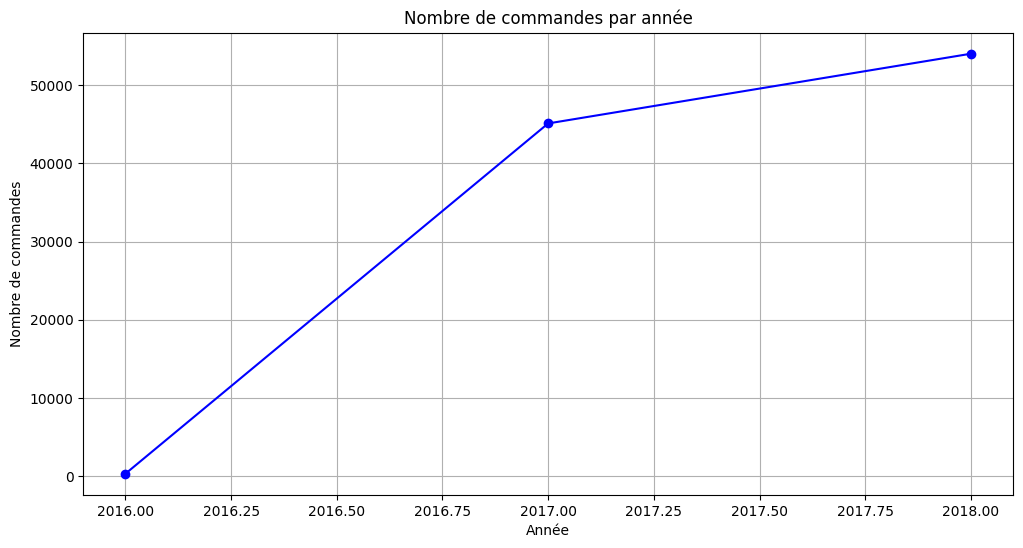

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(ventes_par_annee, marker='o', linestyle='-', color='b')
plt.title("Nombre de commandes par année")
plt.xlabel("Année")
plt.ylabel("Nombre de commandes")
plt.grid(True)
plt.show()

Graphique 2 : Nombre de commandes par mois et année

<Figure size 1400x600 with 0 Axes>

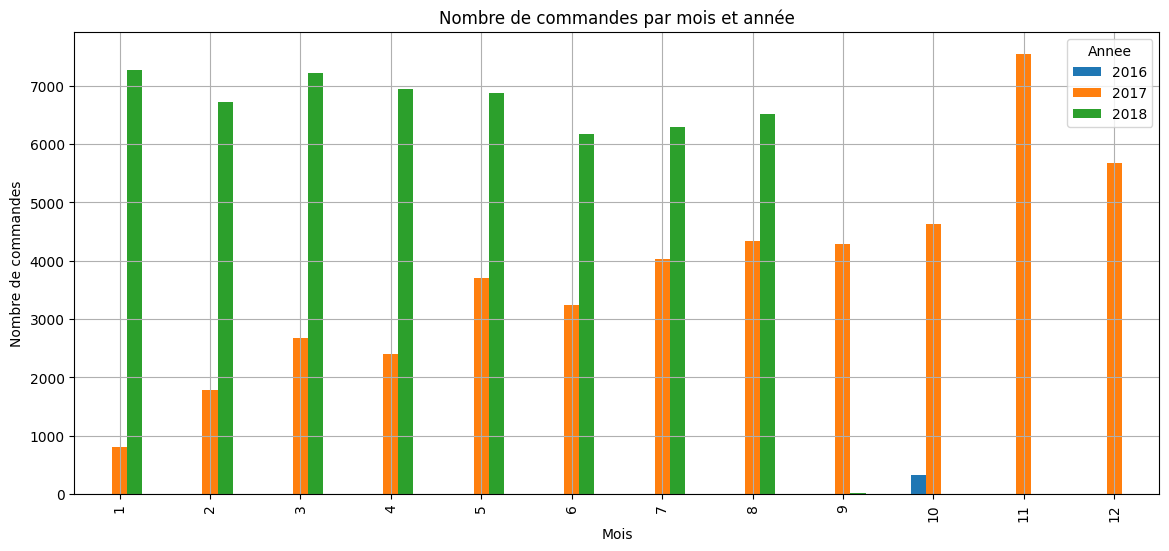

In [4]:
plt.figure(figsize=(14, 6))
ventes_par_mois.unstack(level=0).plot(kind='bar', figsize=(14, 6))
plt.title("Nombre de commandes par mois et année")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.legend(title="Annee")
plt.grid(True)
plt.show()

Graphique 3 : Évolution des ventes quotidiennes par année

<Figure size 1600x600 with 0 Axes>

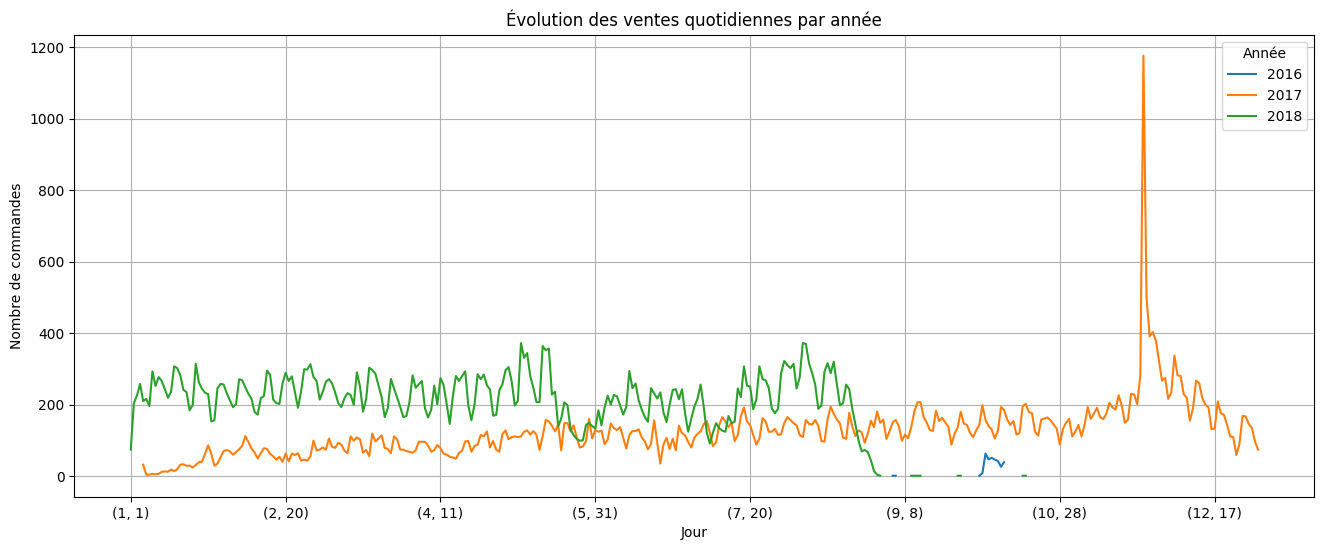

In [5]:
plt.figure(figsize=(16, 6))
ventes_par_jour.unstack(level=0).plot(kind='line', figsize=(16, 6))
plt.title("Évolution des ventes quotidiennes par année")
plt.xlabel("Jour")
plt.ylabel("Nombre de commandes")
plt.legend(title="Année")
plt.grid(True)
plt.show()


Graphique 4 : Heatmap des ventes par mois

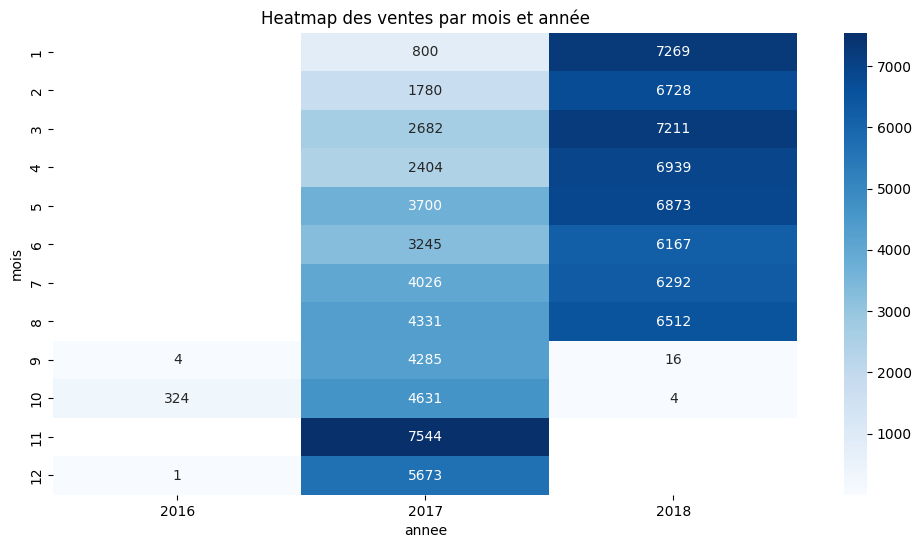

In [6]:

plt.figure(figsize=(12, 6))
sns.heatmap(ventes_par_mois.unstack(level=0), cmap="Blues", annot=True, fmt="g")
plt.title("Heatmap des ventes par mois et année")
plt.show()



Graphique 5 : Histogramme des ventes quotidiennes

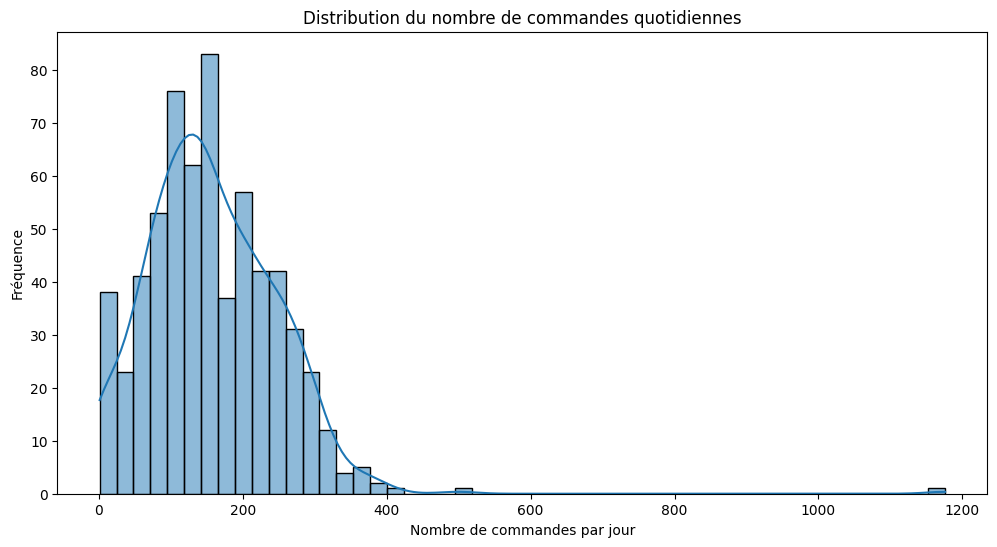

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(ventes_par_jour, bins=50, kde=True)
plt.title("Distribution du nombre de commandes quotidiennes")
plt.xlabel("Nombre de commandes par jour")
plt.ylabel("Fréquence")
plt.show()

Graphique 6 : Courbe d’évolution des ventes par jour

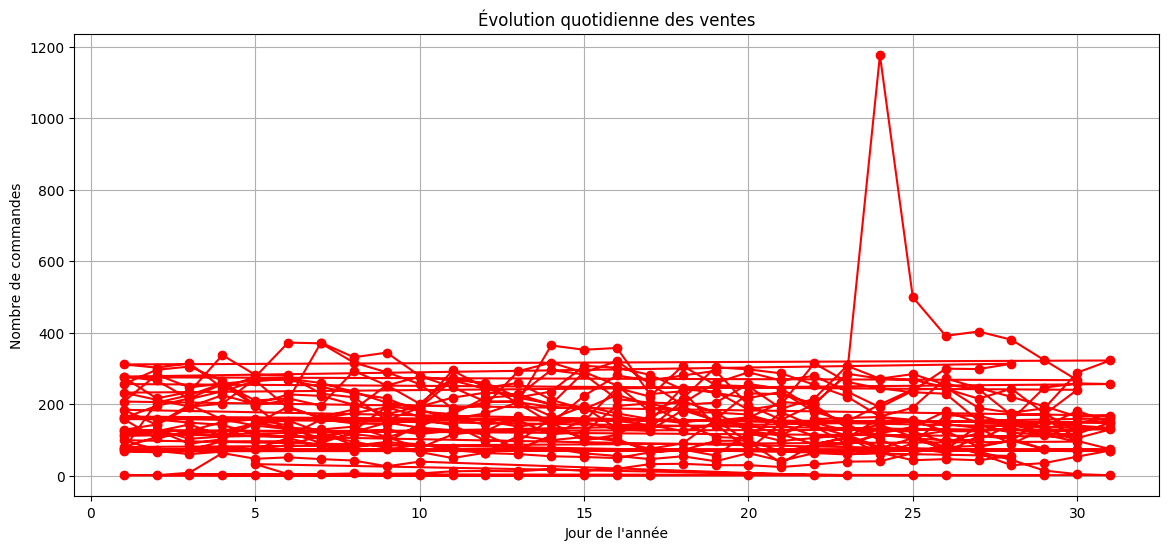

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(ventes_par_jour.index.get_level_values(2), ventes_par_jour.values, marker='o', linestyle='-', color='r')
plt.title("Évolution quotidienne des ventes")
plt.xlabel("Jour de l'année")
plt.ylabel("Nombre de commandes")
plt.grid(True)
plt.show()


Graphique 7 : Boxplot des ventes par mois

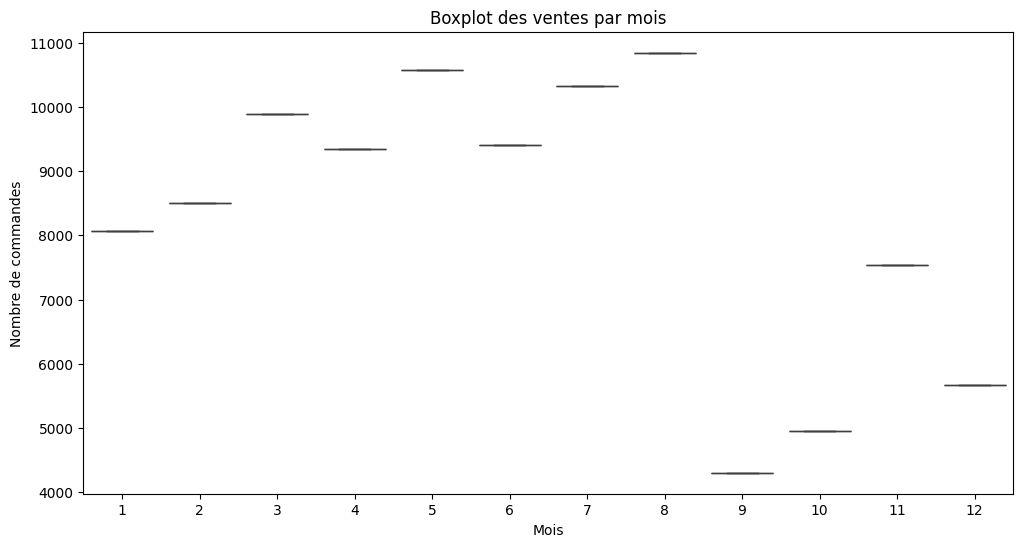

In [9]:

plt.figure(figsize=(12, 6))
sns.boxplot(x=analyse_ventes["mois"], y=analyse_ventes.groupby("mois")["order_id"].transform("count"), whis=[0, 100])
plt.title("Boxplot des ventes par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.show()


Graphique 8 : Heatmap des ventes par jour de la semaine

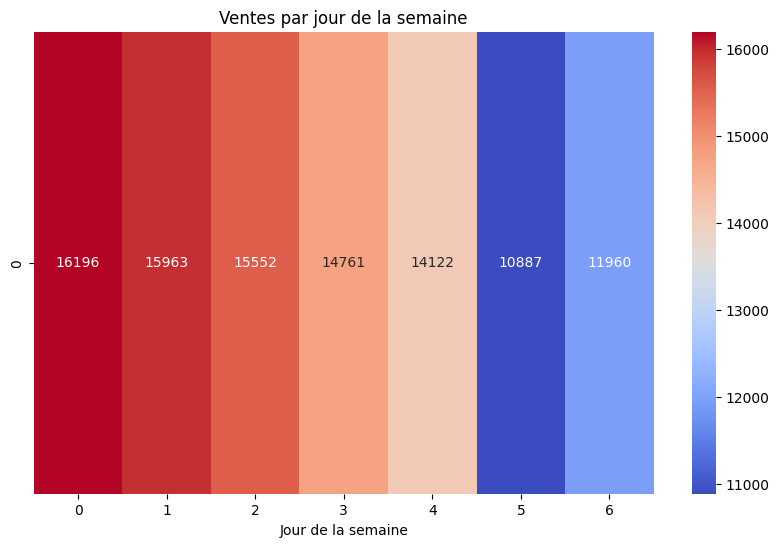

In [10]:
ventes_jour_semaine = analyse_ventes.groupby("jour_semaine")["order_id"].count()
plt.figure(figsize=(10, 6))
sns.heatmap(ventes_jour_semaine.values.reshape(1, -1), cmap="coolwarm", annot=True, fmt="g")
plt.title("Ventes par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.show()

Graphique 9 : Heatmap des ventes par jours de la semaines & mois

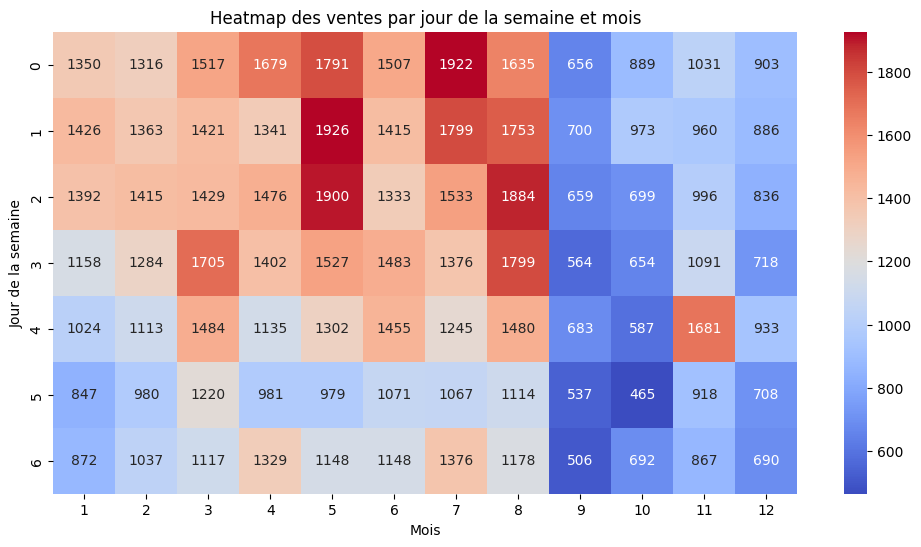

In [11]:

ventes_jour_mois = analyse_ventes.pivot_table(index="jour_semaine", columns="mois", values="order_id", aggfunc="count")


plt.figure(figsize=(12, 6))
sns.heatmap(ventes_jour_mois, cmap="coolwarm", annot=True, fmt="g")
plt.title("Heatmap des ventes par jour de la semaine et mois")
plt.xlabel("Mois")
plt.ylabel("Jour de la semaine")
plt.show()


Graphique 10 : Distribution des commandes par heure de la journée

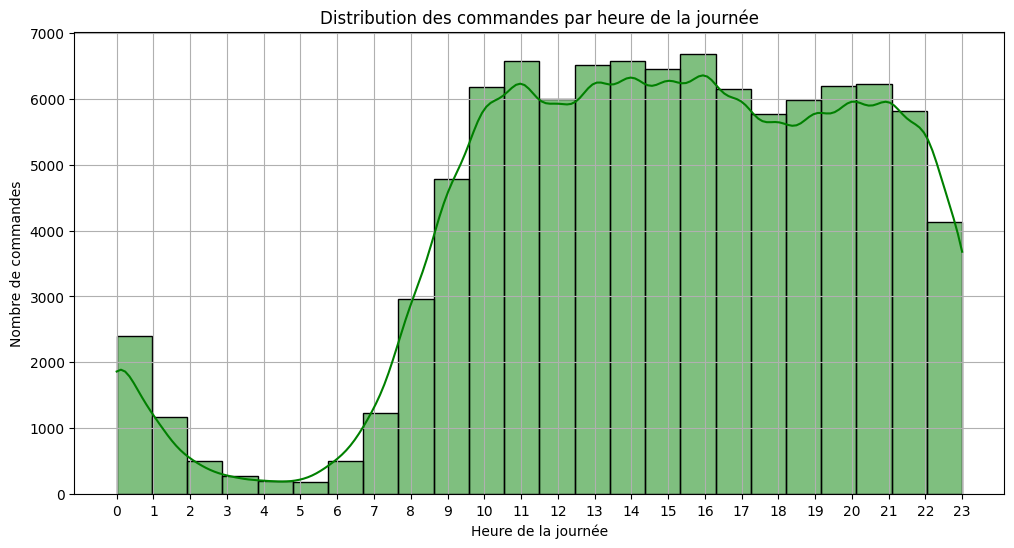

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(analyse_ventes["heure"], bins=24, kde=True, color="green")
plt.title("Distribution des commandes par heure de la journée")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de commandes")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Graphique 11 (Bonus) : Commandes par Régions

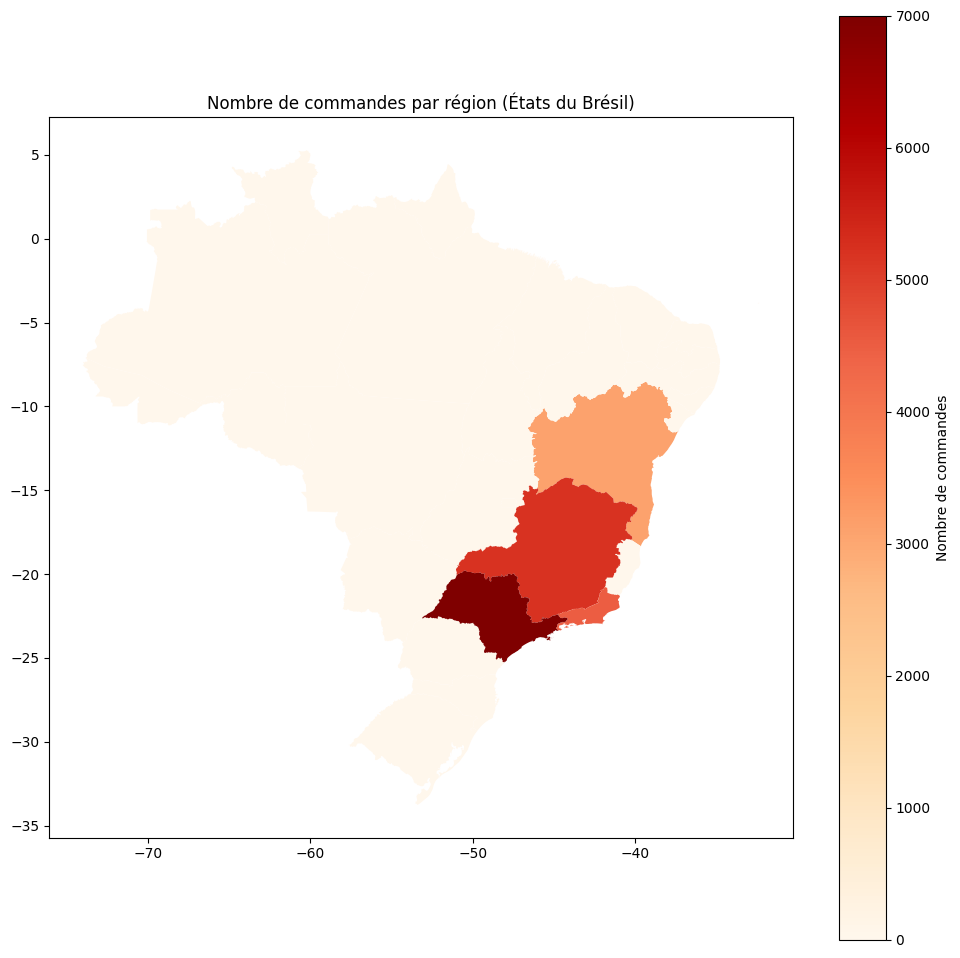

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brazil_states = gpd.read_file(url)
brazil_states.rename(columns={'name': 'region'}, inplace=True)


orders = pd.DataFrame({
    'region': ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Bahia'],
    'total_orders': [7000, 4500, 5200, 3100]
})


brazil_map = brazil_states.merge(orders, on='region', how='left')
brazil_map['total_orders'] = brazil_map['total_orders'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
brazil_map.plot(column='total_orders', ax=ax, legend=True, cmap='OrRd',
                legend_kwds={'label': "Nombre de commandes"})
plt.title("Nombre de commandes par région (États du Brésil)")
plt.show()

 <h3>Paiement</h3>
    <p>Examen des modes de paiement utilisés et des délais de traitement.</p>


Importations et configuration des données

In [14]:
# Charger les données
analyse_ventes = pd.read_parquet("./donnees/analyse_ventes.parquet")

# Sélectionner les colonnes des paiements
paiements_cols = ["int_boleto", "int_credit_card", "int_debit_card", "int_not_defined", "int_voucher", "value_boleto",
                  "value_credit_card", "value_debit_card", "value_not_defined", "value_voucher"]
paiements = analyse_ventes[paiements_cols].copy()

# Création de nouvelles colonnes pour les proportions
paiements["total_transactions"] = paiements[
    ["int_boleto", "int_credit_card", "int_debit_card", "int_not_defined", "int_voucher"]].sum(axis=1)
for col in ["int_boleto", "int_credit_card", "int_debit_card", "int_not_defined", "int_voucher"]:
    paiements[f"{col}_ratio"] = paiements[col] / paiements["total_transactions"]

# Agrégation des données
paiements_summary = paiements.sum()


Graphique 1 : Répartition des modes de paiement

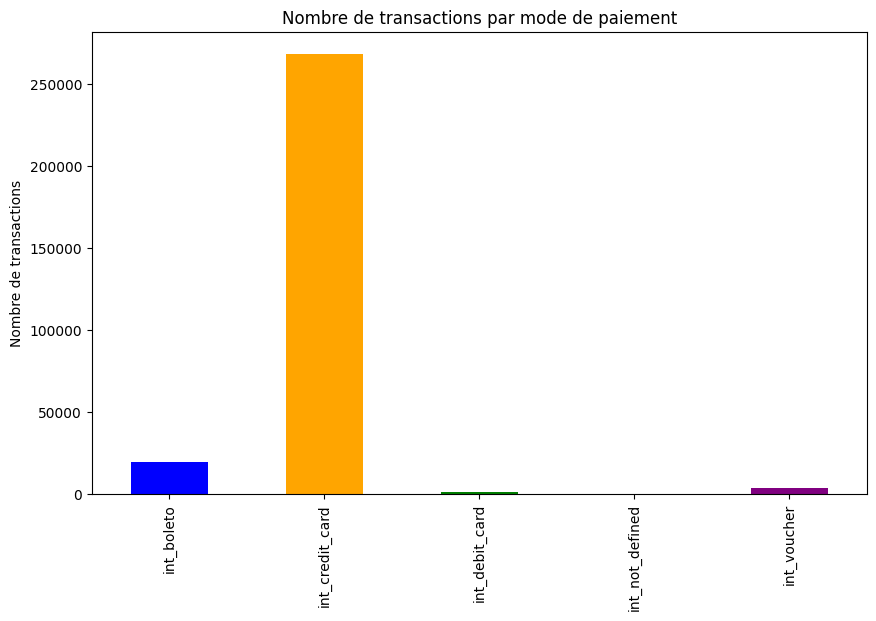

In [15]:
plt.figure(figsize=(10, 6))
paiements_summary[["int_boleto", "int_credit_card", "int_debit_card", "int_not_defined", "int_voucher"]].plot(
    kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Nombre de transactions par mode de paiement")
plt.ylabel("Nombre de transactions")
plt.show()

Graphique 2 : Répartition en pourcentage

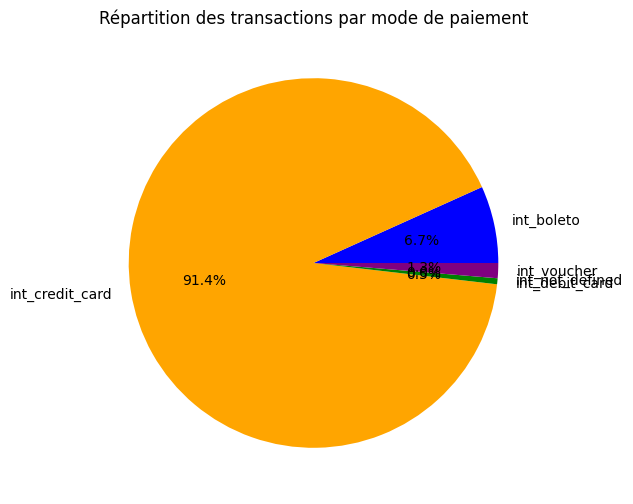

In [16]:
plt.figure(figsize=(10, 6))
paiements_summary[["int_boleto", "int_credit_card", "int_debit_card", "int_not_defined", "int_voucher"]].plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Répartition des transactions par mode de paiement")
plt.ylabel("")
plt.show()

Graphique 3 : Montants moyens par mode de paiement

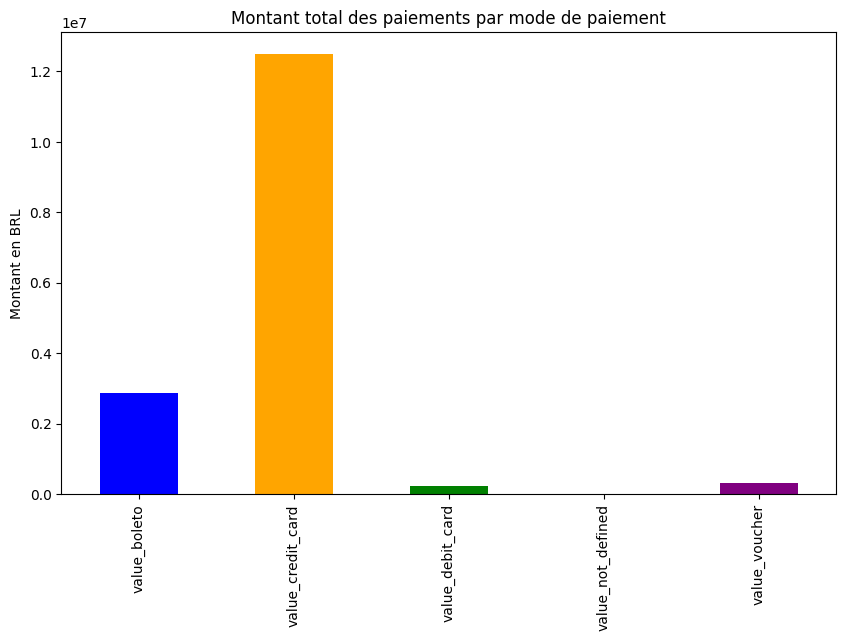

In [17]:
plt.figure(figsize=(10, 6))
paiements_summary[["value_boleto", "value_credit_card", "value_debit_card", "value_not_defined", "value_voucher"]].plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Montant total des paiements par mode de paiement")
plt.ylabel("Montant en BRL")
plt.show()

Graphique 4 : Histogramme du nombre de paiements par commande

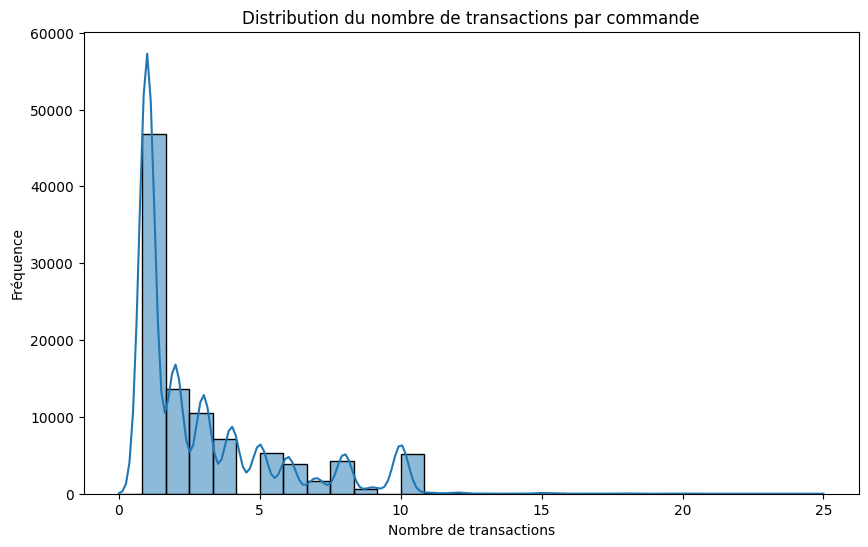

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(paiements["total_transactions"], bins=30, kde=True)
plt.title("Distribution du nombre de transactions par commande")
plt.xlabel("Nombre de transactions")
plt.ylabel("Fréquence")
plt.show()

Graphique 5 : Boxplot des montants de paiements

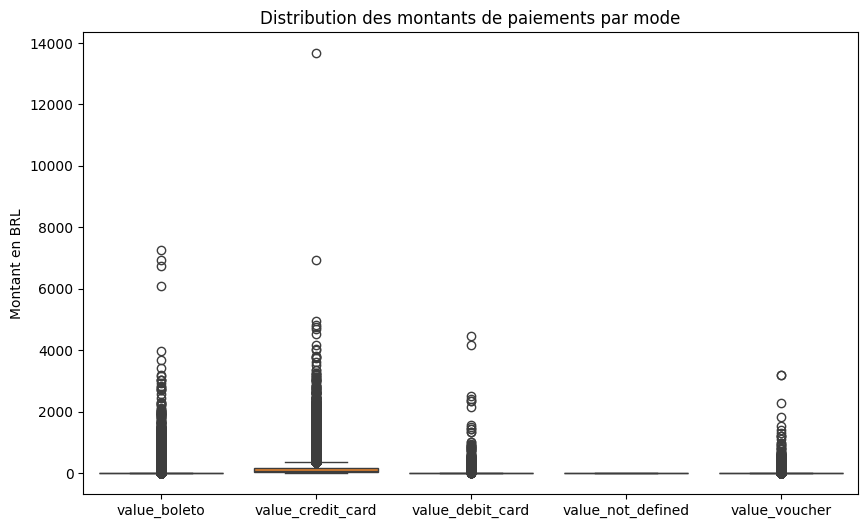

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=paiements[["value_boleto", "value_credit_card", "value_debit_card", "value_not_defined", "value_voucher"]])
plt.title("Distribution des montants de paiements par mode")
plt.ylabel("Montant en BRL")
plt.show()

Graphique 6 : évolution des paiements par mois

<Figure size 1200x600 with 0 Axes>

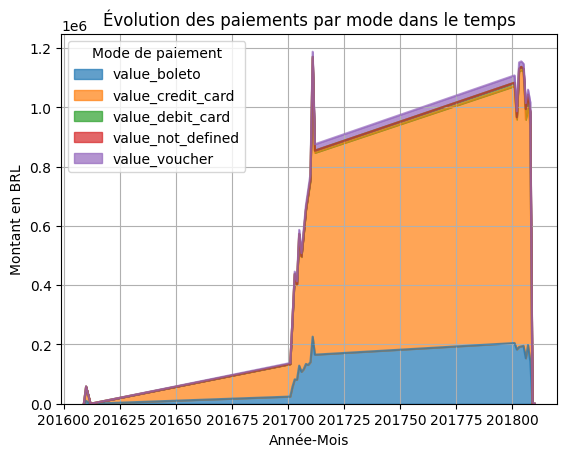

In [20]:
plt.figure(figsize=(12, 6))
paiements_mois = analyse_ventes.groupby("annee_mois")[["value_boleto", "value_credit_card", "value_debit_card", "value_not_defined", "value_voucher"]].sum()
paiements_mois.plot(kind='area', stacked=True, alpha=0.7)
plt.title("Évolution des paiements par mode dans le temps")
plt.xlabel("Année-Mois")
plt.ylabel("Montant en BRL")
plt.legend(title="Mode de paiement")
plt.grid()
plt.show()

Graphique 7 : Répartition des transactions par région et mode de paiement

<Figure size 1200x600 with 0 Axes>

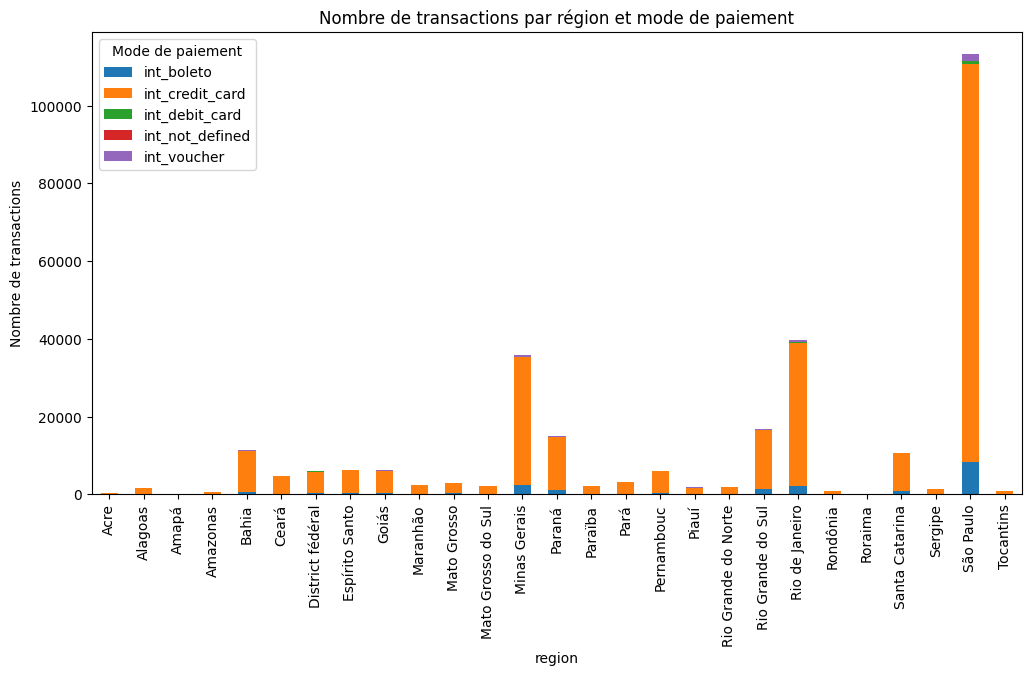

In [21]:
plt.figure(figsize=(12, 6))
paiements["region"] = analyse_ventes["name_state"]
paiements_region = paiements.groupby("region").sum()
paiements_region[["int_boleto", "int_credit_card", "int_debit_card", "int_not_defined", "int_voucher"]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Nombre de transactions par région et mode de paiement")
plt.ylabel("Nombre de transactions")
plt.legend(title="Mode de paiement")
plt.show()

Graphique 8 : Scatter plot montant vs transactions

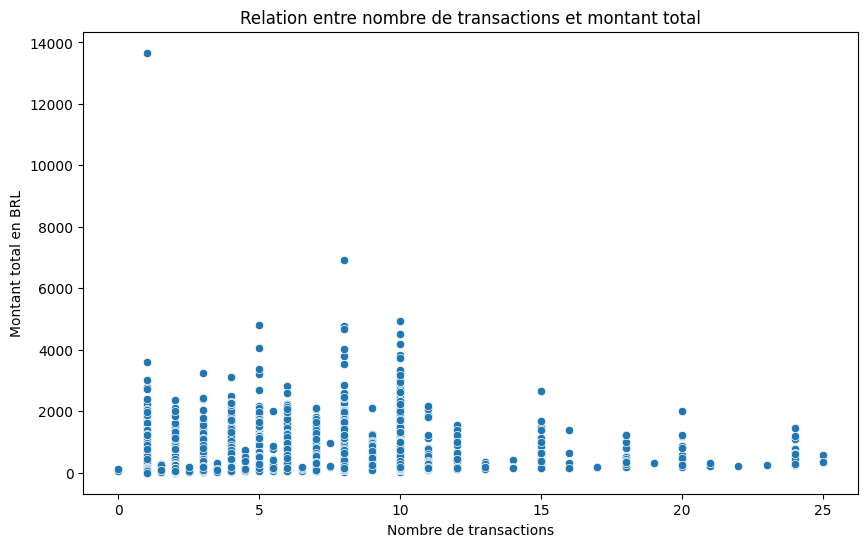

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=paiements["total_transactions"], y=paiements["value_credit_card"])
plt.title("Relation entre nombre de transactions et montant total")
plt.xlabel("Nombre de transactions")
plt.ylabel("Montant total en BRL")
plt.show()

Graphique 9 : Heatmap des transactions par mode de paiement


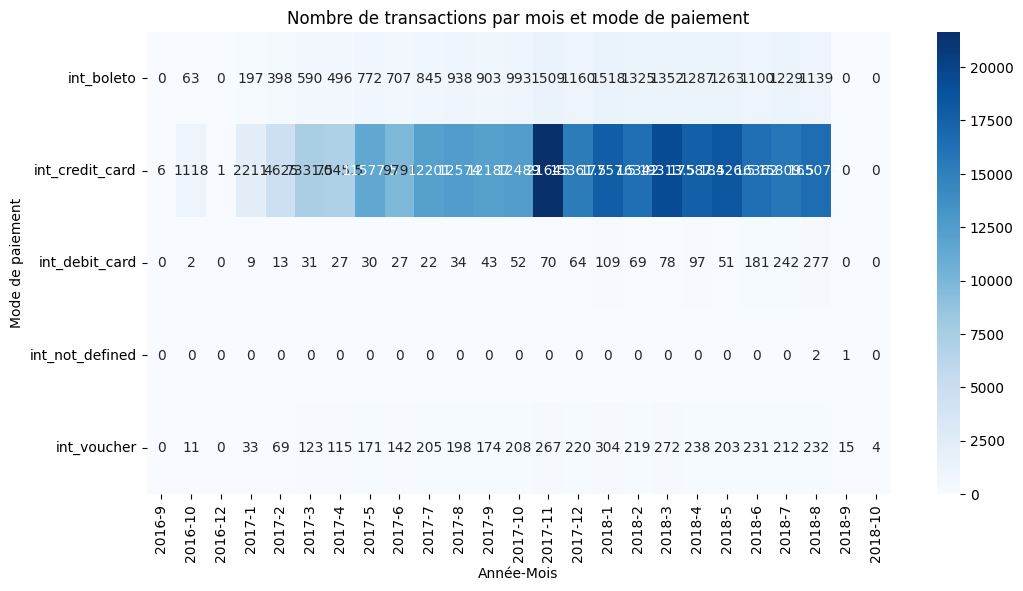

In [23]:
plt.figure(figsize=(12, 6))
paiements_mois = analyse_ventes.groupby(["annee", "mois"])[["int_boleto", "int_credit_card", "int_debit_card", "int_not_defined", "int_voucher"]].sum()
sns.heatmap(paiements_mois.T, cmap="Blues", annot=True, fmt="g")
plt.title("Nombre de transactions par mois et mode de paiement")
plt.xlabel("Année-Mois")
plt.ylabel("Mode de paiement")
plt.show()

Graphique 10 : Répartition des transactions par région



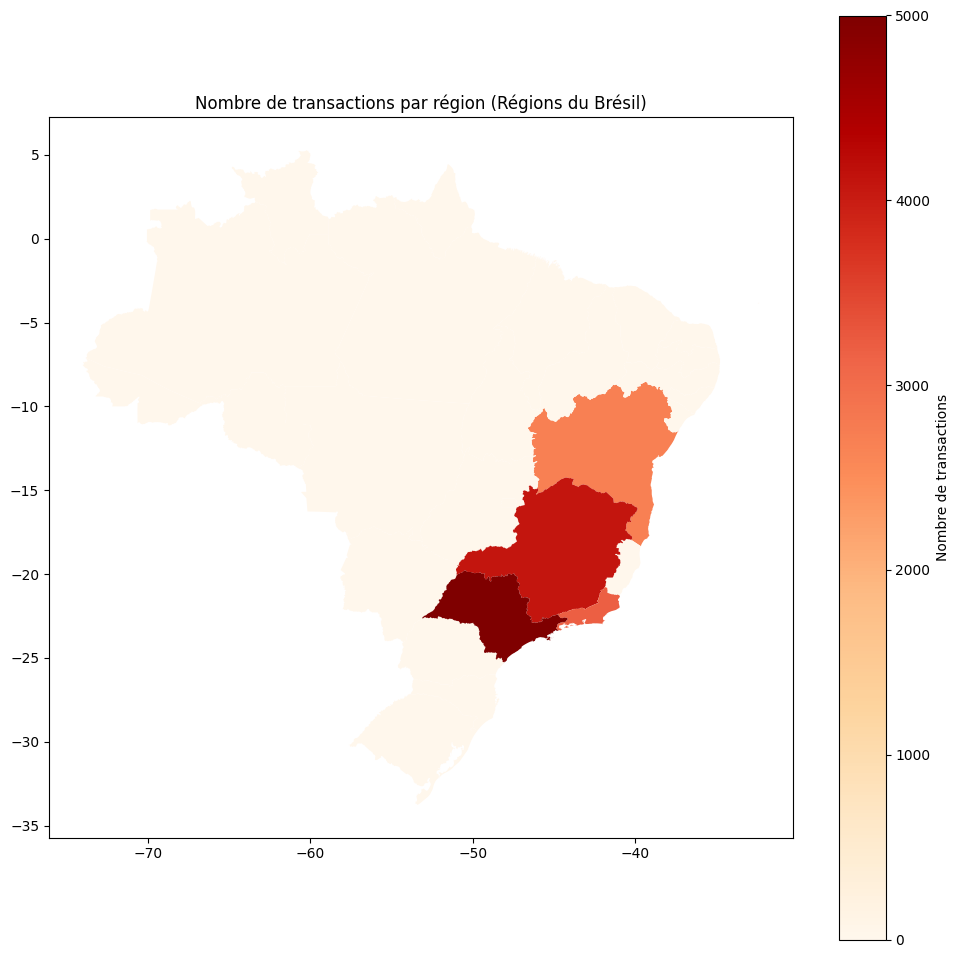

In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brazil_states = gpd.read_file(url)
brazil_states.rename(columns={'name': 'region'}, inplace=True)

paiements = pd.DataFrame({
    'region': ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Bahia'],
    'total_transactions': [5000, 3200, 4100, 2700]
})

brazil_map = brazil_states.merge(paiements, on='region', how='left')
brazil_map['total_transactions'] = brazil_map['total_transactions'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
brazil_map.plot(column='total_transactions', ax=ax, legend=True, cmap='OrRd',
                legend_kwds={'label': "Nombre de transactions"})
plt.title("Nombre de transactions par région (Régions du Brésil)")
plt.show()


 <h3>Livraison</h3>
    <p>Étude des performances logistiques, incluant les délais de livraison et les éventuels retards.</p>


Importations et configuration des données


In [25]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
analyse_ventes = pd.read_parquet("./donnees/analyse_ventes.parquet")

# Convertir les dates
analyse_ventes["purchase_timestamp"] = pd.to_datetime(analyse_ventes["purchase_timestamp"])
analyse_ventes["delivered_customer"] = pd.to_datetime(analyse_ventes["delivered_customer"])
analyse_ventes["estimated_delivery"] = pd.to_datetime(analyse_ventes["estimated_delivery"])

# Calcul du délai de livraison réel et de l'écart avec la livraison estimée
analyse_ventes["delai_livraison"] = (analyse_ventes["delivered_customer"] - analyse_ventes["purchase_timestamp"]).dt.days
analyse_ventes["retard_livraison"] = (analyse_ventes["delivered_customer"] - analyse_ventes["estimated_delivery"]).dt.days


# Séparer les retards et les avances
analyse_ventes["retard_livraison"] = analyse_ventes["retard_livraison"].apply(lambda x: x if x > 0 else 0)
analyse_ventes["avance_livraison"] = analyse_ventes["retard_livraison"].apply(lambda x: abs(x) if x < 0 else 0)

# Grouper par hiérarchie (État -> Ville -> Livraison)
livraison_par_etat = analyse_ventes.groupby("name_state")["delai_livraison"].mean()
livraison_par_ville = analyse_ventes.groupby("city")["delai_livraison"].mean()
livraison_par_ville = livraison_par_ville[livraison_par_ville.notna()]



Graphique 1 : Distribution des délais de livraison

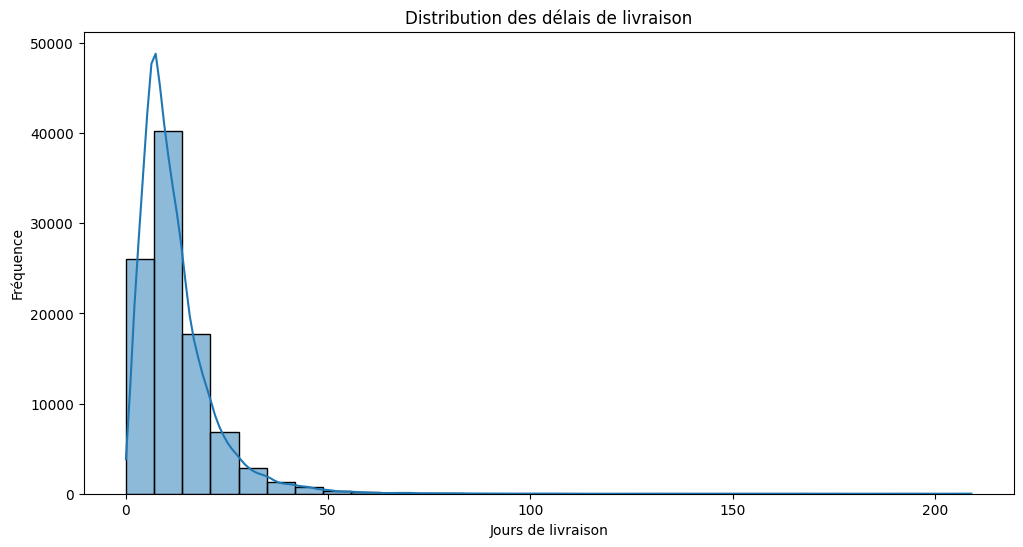

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(analyse_ventes["delai_livraison"], bins=30, kde=True)
plt.title("Distribution des délais de livraison")
plt.xlabel("Jours de livraison")
plt.ylabel("Fréquence")
plt.show()

Graphique 2 : Retards de livraison par état

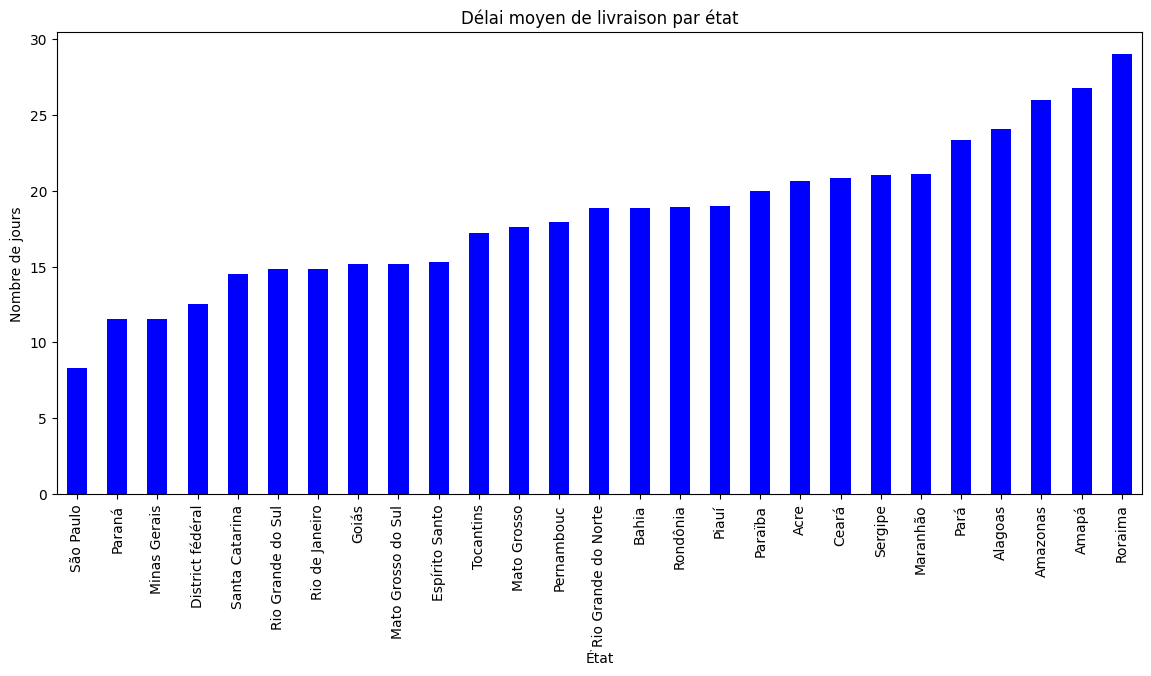

In [27]:

plt.figure(figsize=(14, 6))
livraison_par_etat.sort_values().plot(kind='bar', color='blue')
plt.title("Délai moyen de livraison par état")
plt.xlabel("État")
plt.ylabel("Nombre de jours")
plt.show()

Graphique 3 : Comparaison de la livraison estimée et réelle

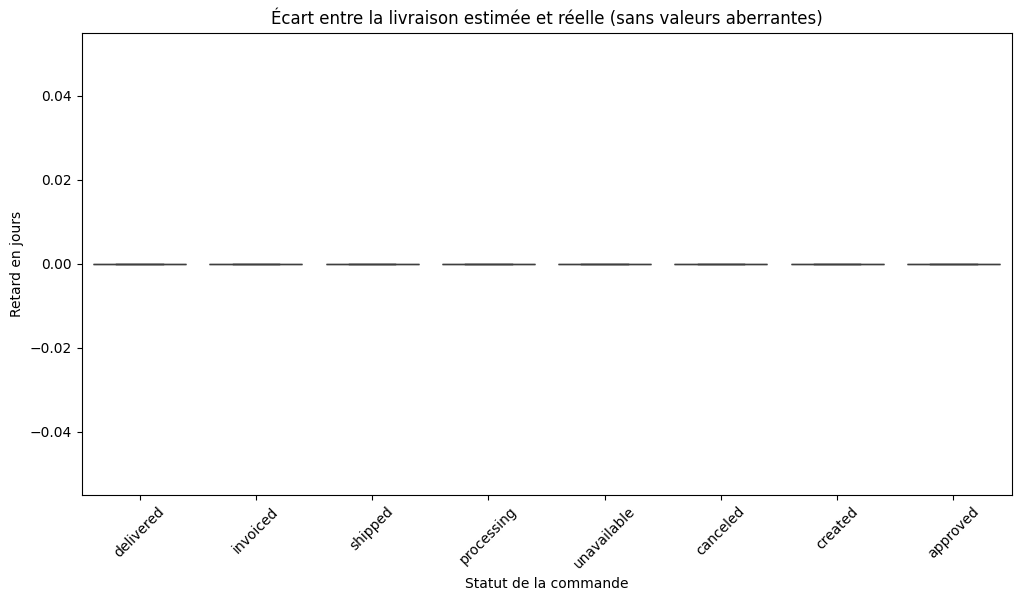

In [28]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=analyse_ventes, x="status", y="retard_livraison", showfliers=False)
plt.title("Écart entre la livraison estimée et réelle (sans valeurs aberrantes)")
plt.xlabel("Statut de la commande")
plt.ylabel("Retard en jours")
plt.xticks(rotation=45)
plt.show()

 Graphique 4 : Évolution des retards par mois

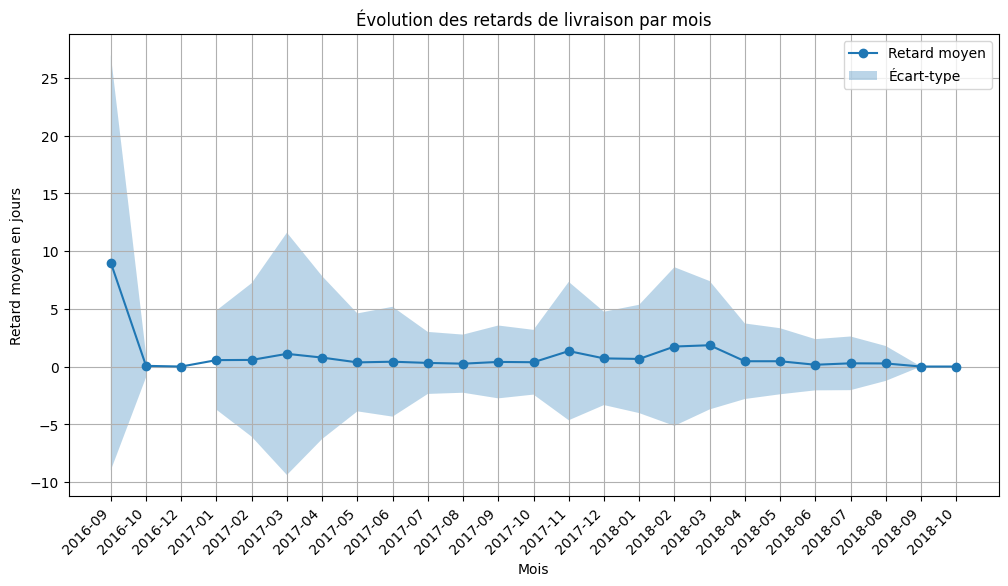

In [29]:

analyse_ventes["annee_mois"] = pd.to_datetime(analyse_ventes["purchase_timestamp"]).dt.to_period("M")
retards_par_mois = analyse_ventes.groupby("annee_mois")["retard_livraison"].agg(['mean', 'std'])

plt.figure(figsize=(12, 6))
plt.plot(retards_par_mois.index.astype(str), retards_par_mois['mean'], marker='o', label="Retard moyen")
plt.fill_between(retards_par_mois.index.astype(str),
                 retards_par_mois['mean'] - retards_par_mois['std'],
                 retards_par_mois['mean'] + retards_par_mois['std'],
                 alpha=0.3, label="Écart-type")
plt.title("Évolution des retards de livraison par mois")
plt.xlabel("Mois")
plt.ylabel("Retard moyen en jours")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid()
plt.show()

Graphique 5 : Heatmap des délais de livraison par mois

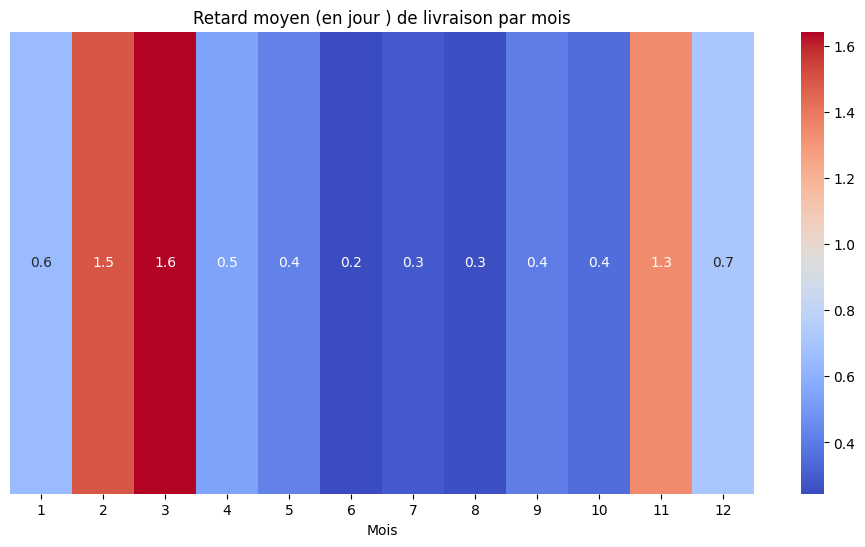

In [30]:
retards_par_mois = analyse_ventes.groupby("mois")["retard_livraison"].mean()


plt.figure(figsize=(12, 6))

sns.heatmap(retards_par_mois.values.reshape(1, -1), cmap="coolwarm", annot=True, fmt=".1f",
            xticklabels=retards_par_mois.index, yticklabels='')
plt.title("Retard moyen (en jour ) de livraison par mois")
plt.xlabel("Mois")
plt.show()

Graphique 6 : Retards moyens de livraison par ville

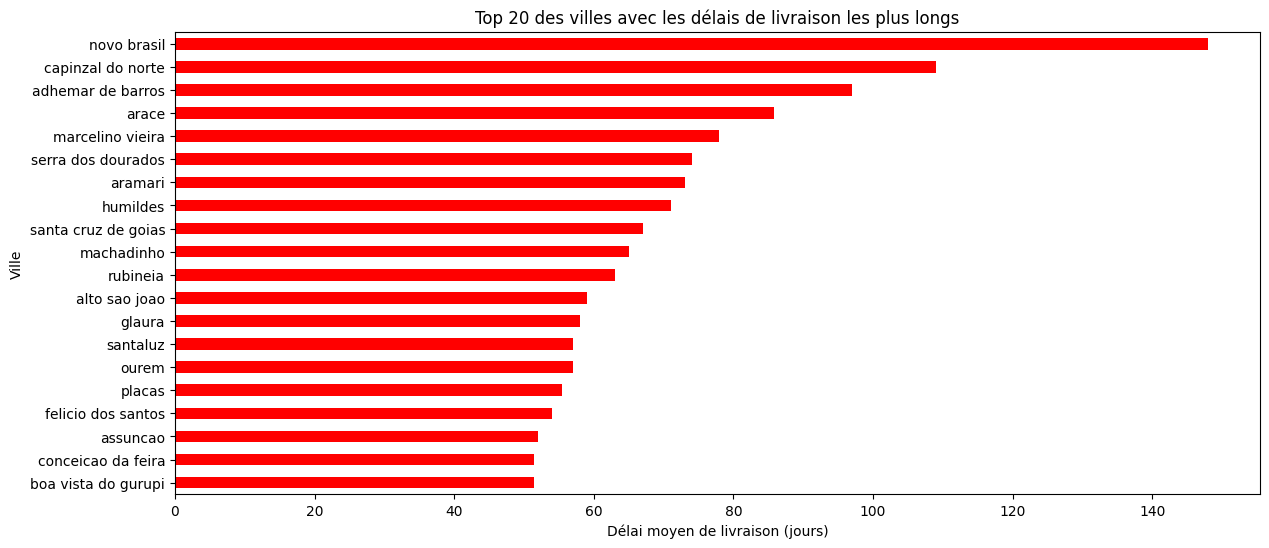

In [31]:

plt.figure(figsize=(14, 6))
livraison_par_ville.sort_values().tail(20).plot(kind='barh', color='red')
plt.title("Top 20 des villes avec les délais de livraison les plus longs")
plt.xlabel("Délai moyen de livraison (jours)")
plt.ylabel("Ville")
plt.show()

Graphique 7 : Délai moyen de livraison par état et par mois

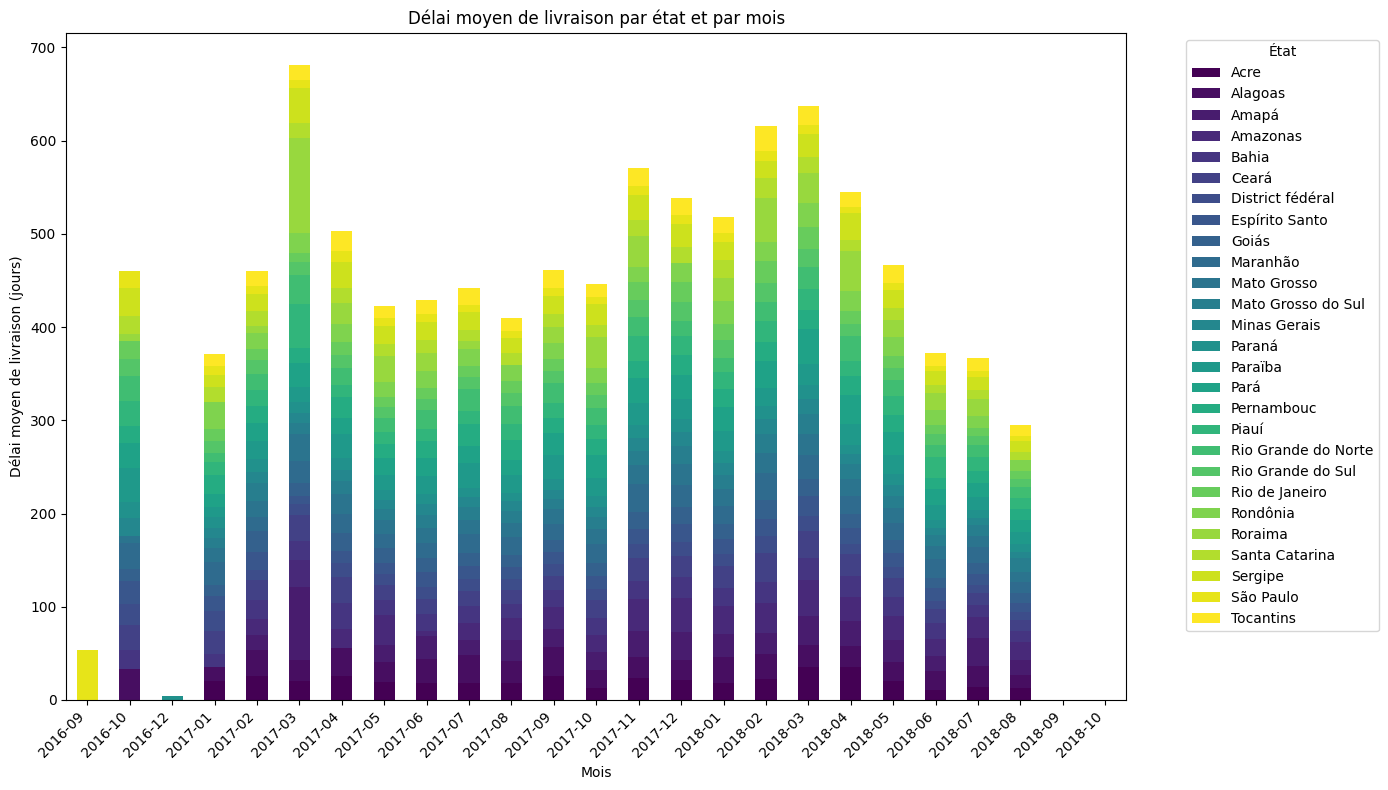

In [32]:

delais_par_etat_mois = analyse_ventes.groupby(["name_state", "annee_mois"])["delai_livraison"].mean().unstack()

delais_par_etat_mois.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title("Délai moyen de livraison par état et par mois")
plt.xlabel("Mois")
plt.ylabel("Délai moyen de livraison (jours)")
plt.legend(title="État", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Graphique 8 : Scatter plot entre la distance client-vendeur et les délais de livraison

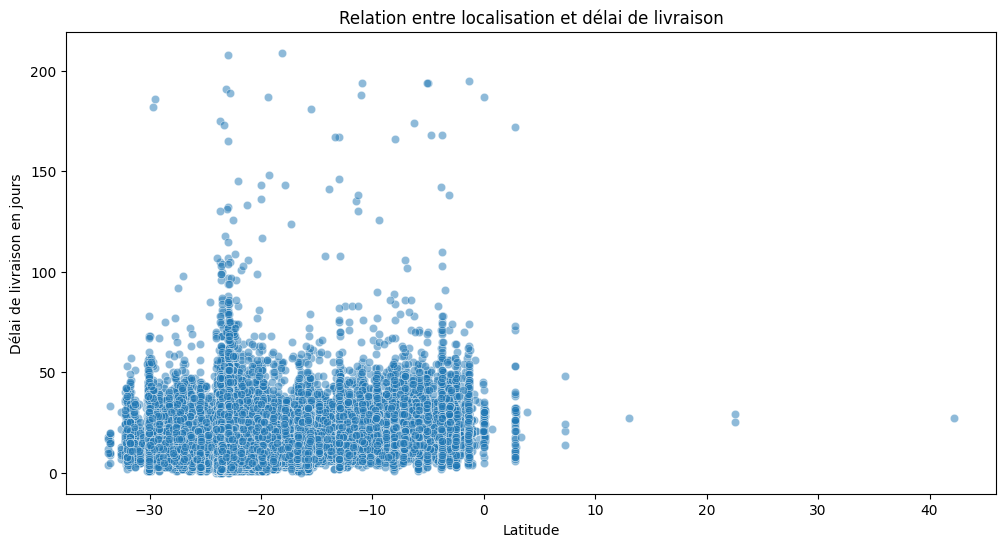

In [33]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x=analyse_ventes["lat"], y=analyse_ventes["delai_livraison"], alpha=0.5)
plt.title("Relation entre localisation et délai de livraison")
plt.xlabel("Latitude")
plt.ylabel("Délai de livraison en jours")
plt.show()


 Graphique 9 : Histogramme des écarts de livraison

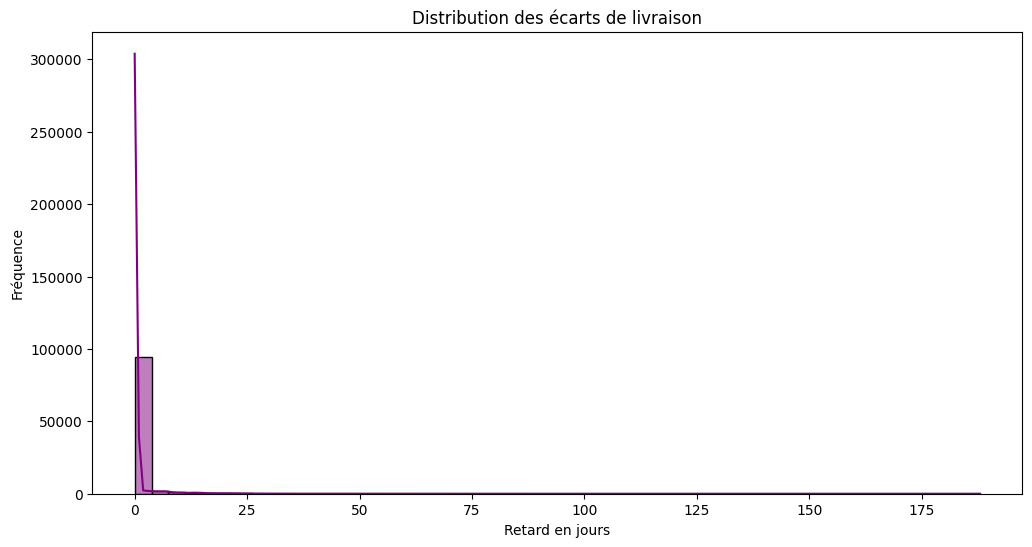

In [34]:

plt.figure(figsize=(12, 6))
sns.histplot(analyse_ventes["retard_livraison"], bins=50, kde=True, color='purple')
plt.title("Distribution des écarts de livraison")
plt.xlabel("Retard en jours")
plt.ylabel("Fréquence")
plt.show()

Graphique 10 : Retard moyen de livraison CARTE

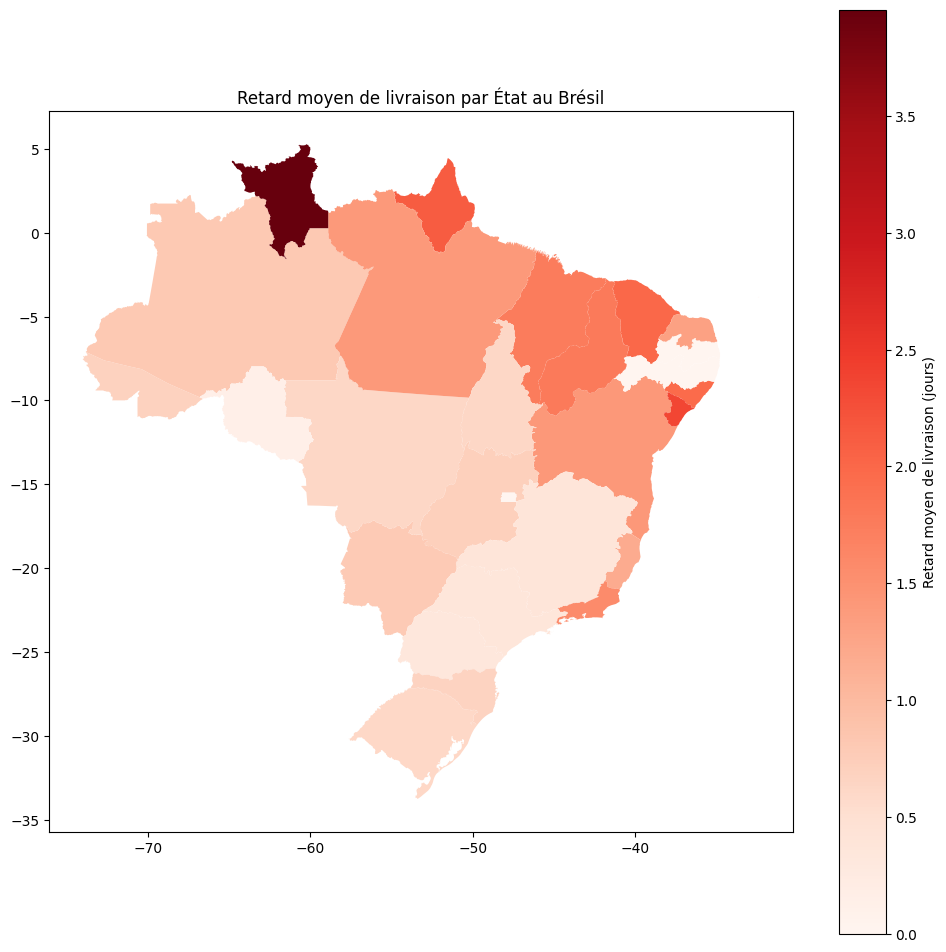

In [35]:

retard_par_etat = analyse_ventes.groupby("name_state")["retard_livraison"].mean().reset_index()
retard_par_etat.rename(columns={"name_state": "region"}, inplace=True)
brazil_map = brazil_states.merge(retard_par_etat, on='region', how='left')
brazil_map['retard_livraison'] = brazil_map['retard_livraison'].fillna(0)
fig, ax = plt.subplots(figsize=(12, 12))
brazil_map.plot(column='retard_livraison', ax=ax, legend=True, cmap='Reds',
                legend_kwds={'label': "Retard moyen de livraison (jours)"})
plt.title("Retard moyen de livraison par État au Brésil")
plt.show()

  <hr>
    <h2>Analyse Achat</h2>



  <h3>Catégories</h3>
    <p>Analyse des différentes catégories de produits vendus et de leur performance.</p>

Importations et configuration des données


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
analyse_achat = pd.read_parquet("./donnees/analyse_achat.parquet")

# Sélectionner les colonnes utiles
produits = analyse_achat[["product_id", "category_name", "price", "order_id"]].copy()

# Nombre de ventes par catégorie
ventes_par_categorie = produits.groupby("category_name")["order_id"].count().sort_values(ascending=False)

# Prix moyen par catégorie
prix_moyen_categorie = produits.groupby("category_name")["price"].mean().sort_values(ascending=False)



Graphique 1 : Top 10 des catégories les plus vendues

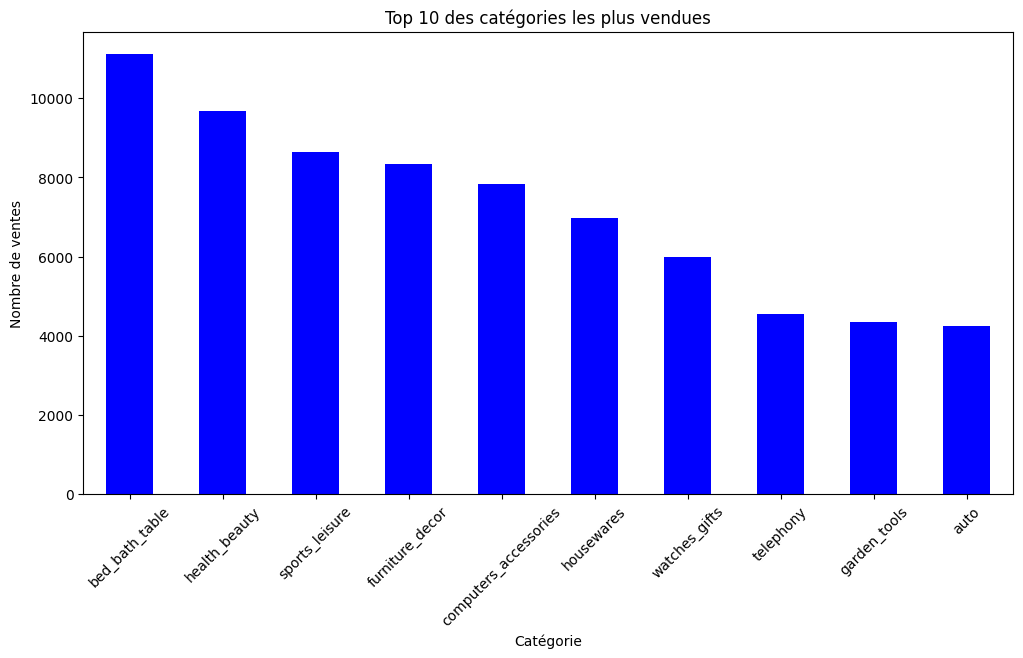

In [37]:
plt.figure(figsize=(12, 6))
ventes_par_categorie.head(10).plot(kind='bar', color='blue')
plt.title("Top 10 des catégories les plus vendues")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=45)
plt.show()

Graphique 2 : Répartition des ventes par catégorie

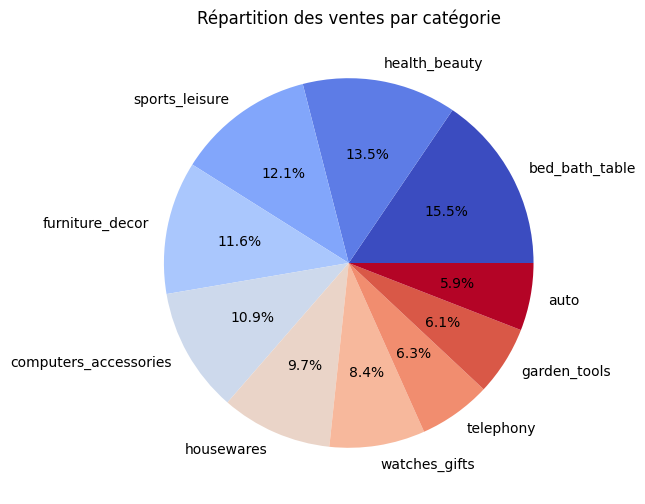

In [38]:

plt.figure(figsize=(10, 6))
ventes_par_categorie.head(10).plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm')
plt.title("Répartition des ventes par catégorie")
plt.ylabel("")
plt.show()

Graphique 3 : Prix moyen par catégorie (Top 10)

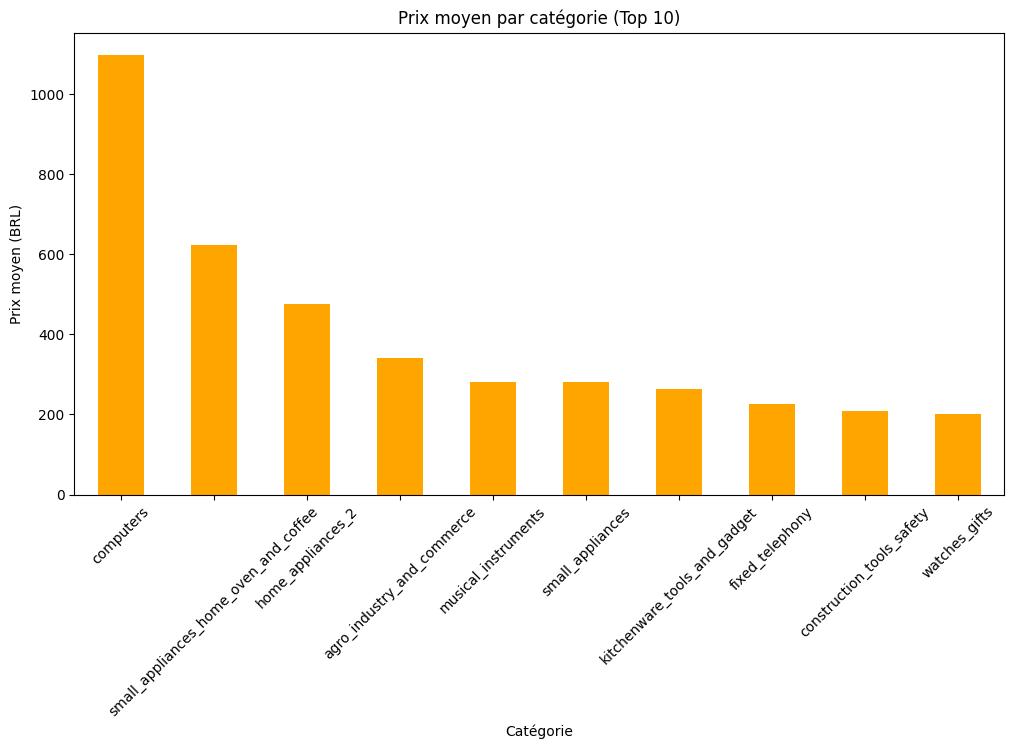

In [39]:
plt.figure(figsize=(12, 6))
prix_moyen_categorie.head(10).plot(kind='bar', color='orange')
plt.title("Prix moyen par catégorie (Top 10)")
plt.xlabel("Catégorie")
plt.ylabel("Prix moyen (BRL)")
plt.xticks(rotation=45)
plt.show()

Graphique violinplot des prix par catégorie

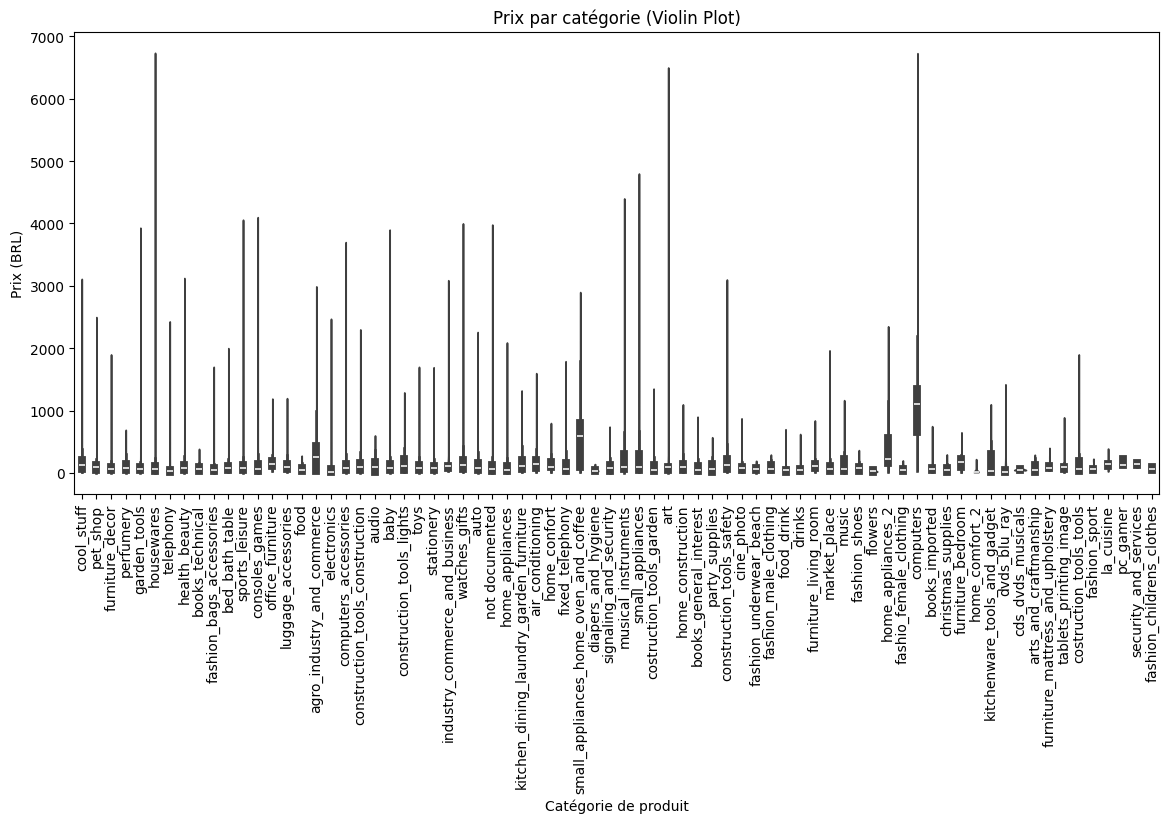

In [40]:
plt.figure(figsize=(14, 6))
sns.violinplot(x="category_name", y="price", data=analyse_achat, cut=0)
plt.xticks(rotation=90)
plt.title("Prix par catégorie (Violin Plot)")
plt.xlabel("Catégorie de produit")
plt.ylabel("Prix (BRL)")
plt.show()

Graphique 5 : Heatmap des ventes par catégorie

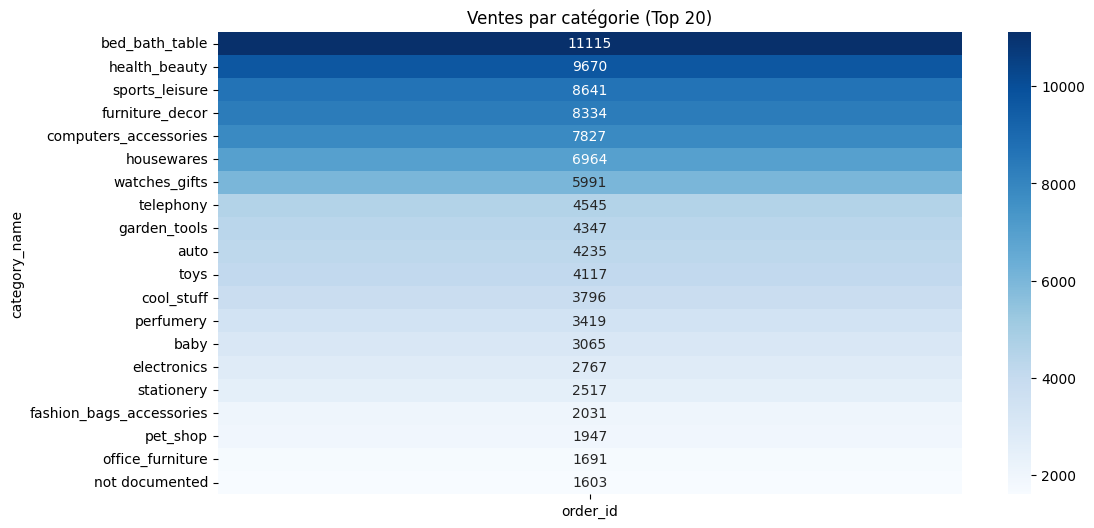

In [41]:

plt.figure(figsize=(12, 6))
sns.heatmap(pd.DataFrame(ventes_par_categorie.head(20)), annot=True, cmap="Blues", fmt="g")
plt.title("Ventes par catégorie (Top 20)")
plt.show()

Graphique 6 : Relation entre prix et volume de ventes

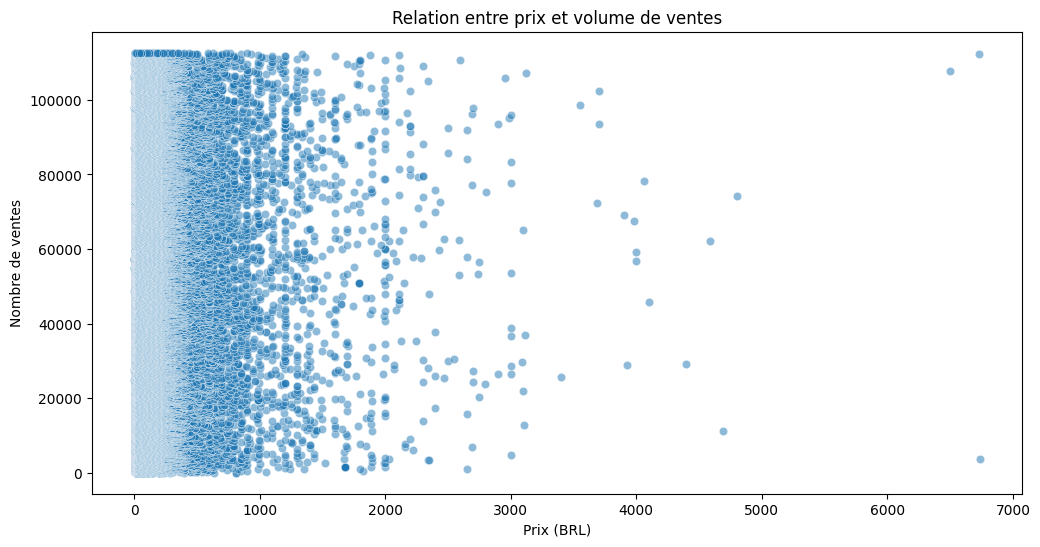

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=produits["price"], y=produits.index, alpha=0.5)
plt.title("Relation entre prix et volume de ventes")
plt.xlabel("Prix (BRL)")
plt.ylabel("Nombre de ventes")
plt.show()


Graphique 7 : Évolution des ventes par catégorie dans le temps

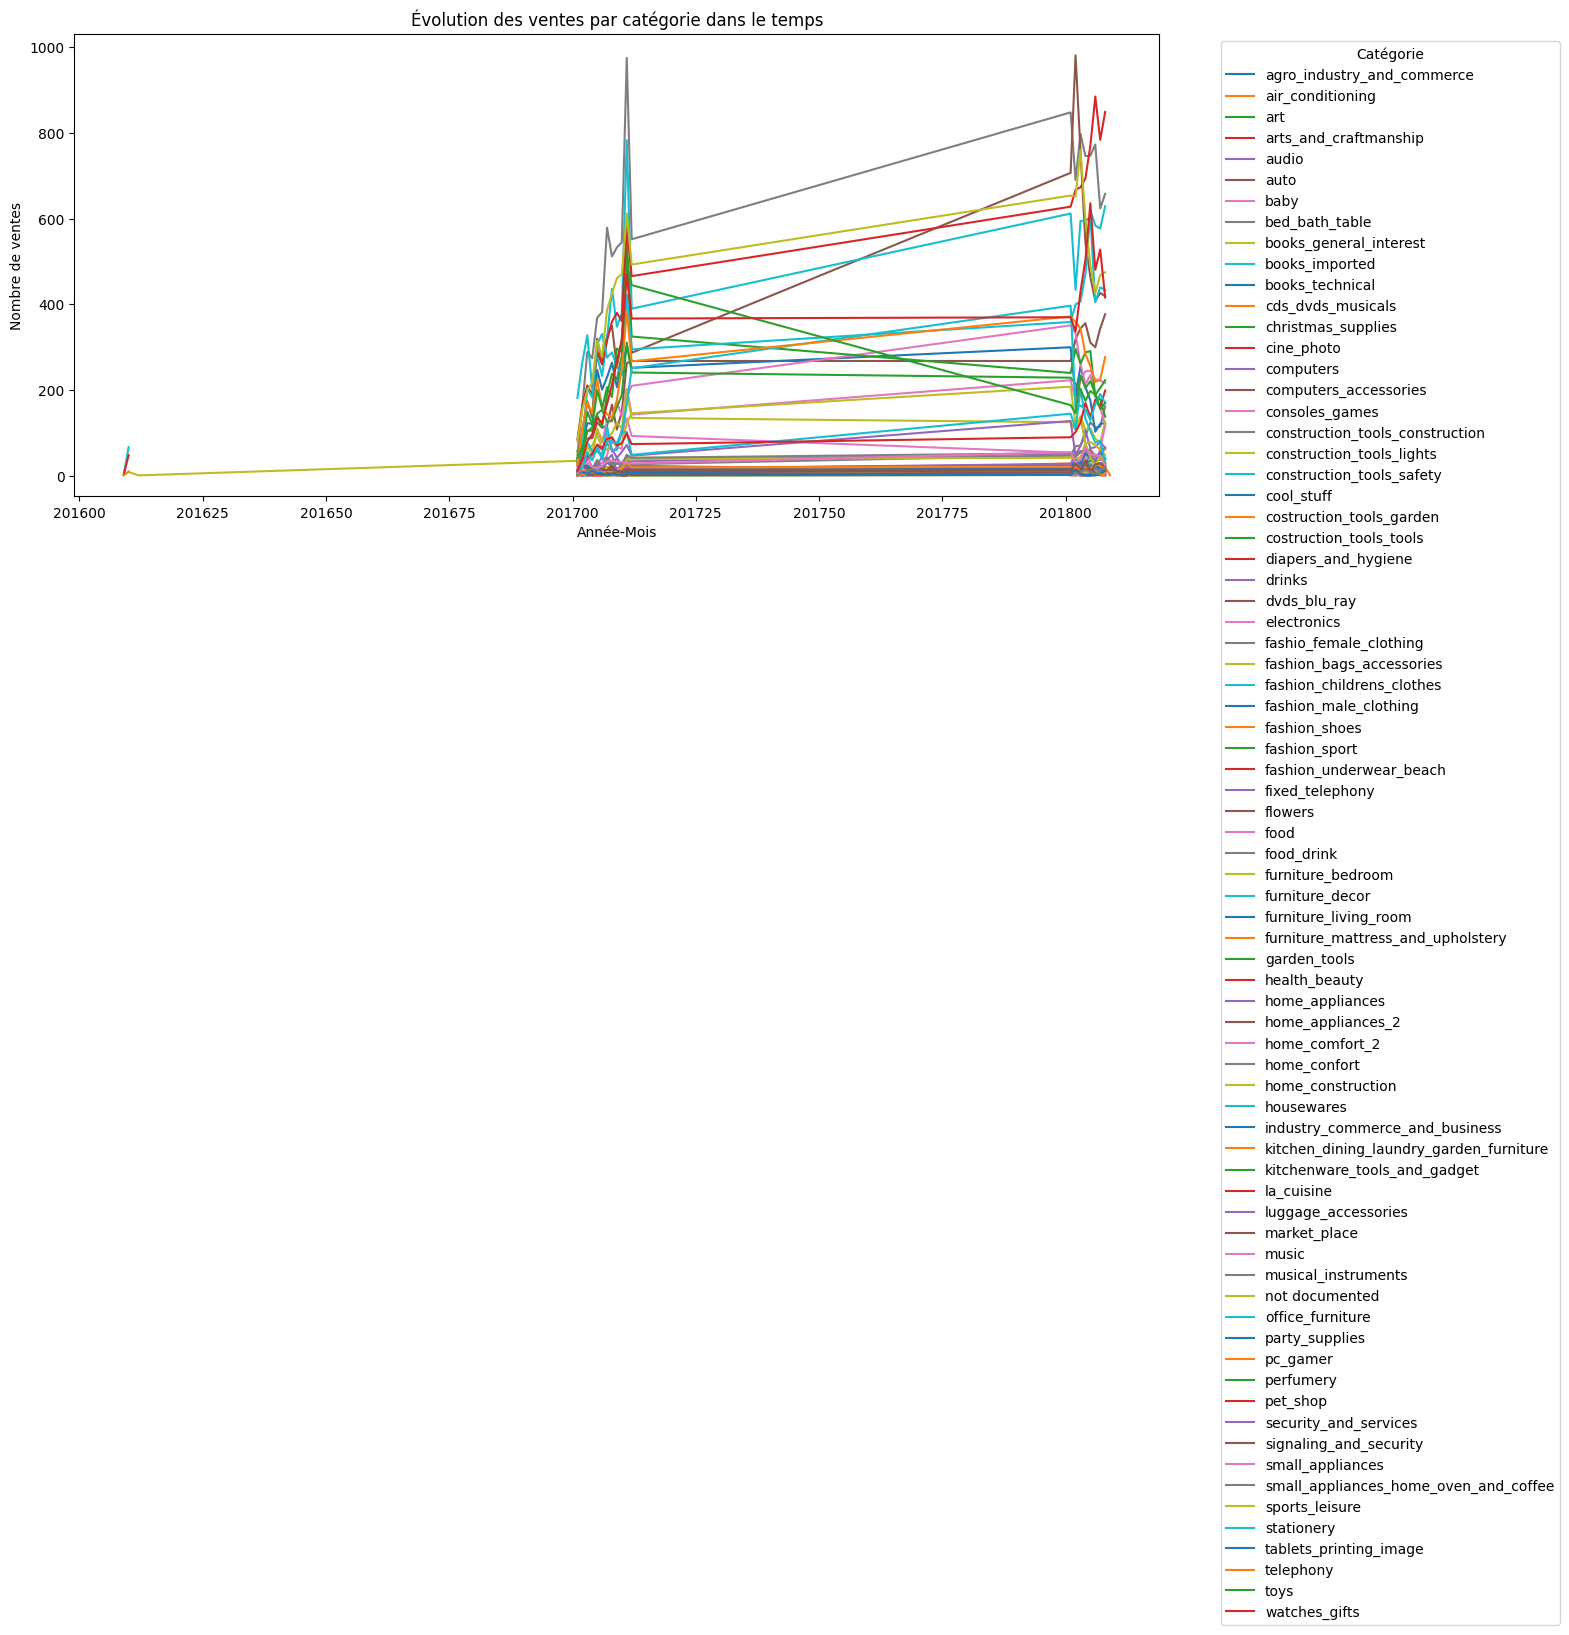

In [43]:
produits["annee_mois"] = analyse_achat["annee_mois"].copy()
ventes_temps = produits.groupby(["annee_mois", "category_name"]).count()["order_id"].unstack()
ventes_temps.plot(kind='line', figsize=(14, 6))
plt.title("Évolution des ventes par catégorie dans le temps")
plt.xlabel("Année-Mois")
plt.ylabel("Nombre de ventes")
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Graphique 8 : Répartition des ventes par tranche de prix

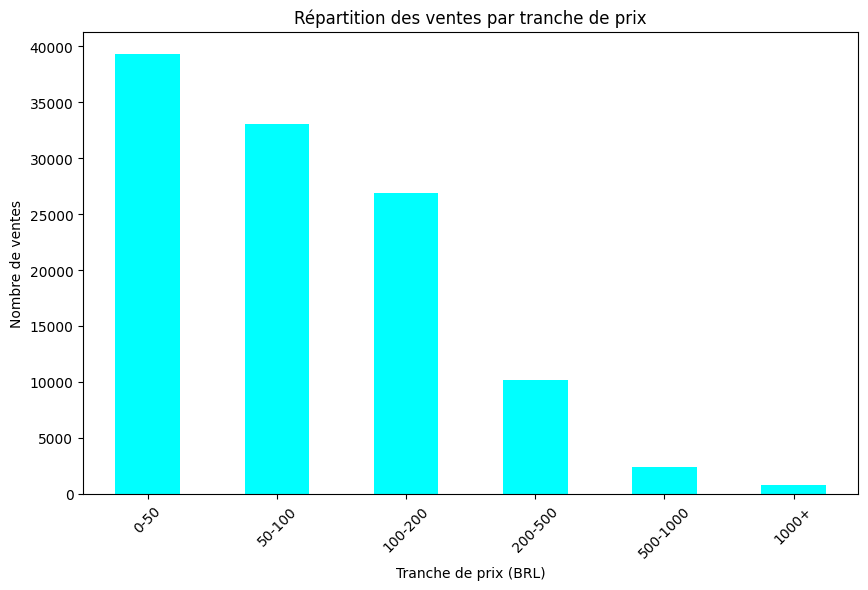

In [44]:
bins = [0, 50, 100, 200, 500, 1000, 5000]
labels = ["0-50", "50-100", "100-200", "200-500", "500-1000", "1000+"]
produits["price_range"] = pd.cut(produits["price"], bins=bins, labels=labels)
prix_tranches = produits.groupby("price_range", observed=False)["order_id"].count()
plt.figure(figsize=(10, 6))
prix_tranches.plot(kind='bar', color='cyan')
plt.title("Répartition des ventes par tranche de prix")
plt.xlabel("Tranche de prix (BRL)")
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=45)
plt.show()

Graphique 9 : Histogramme des ventes par produit

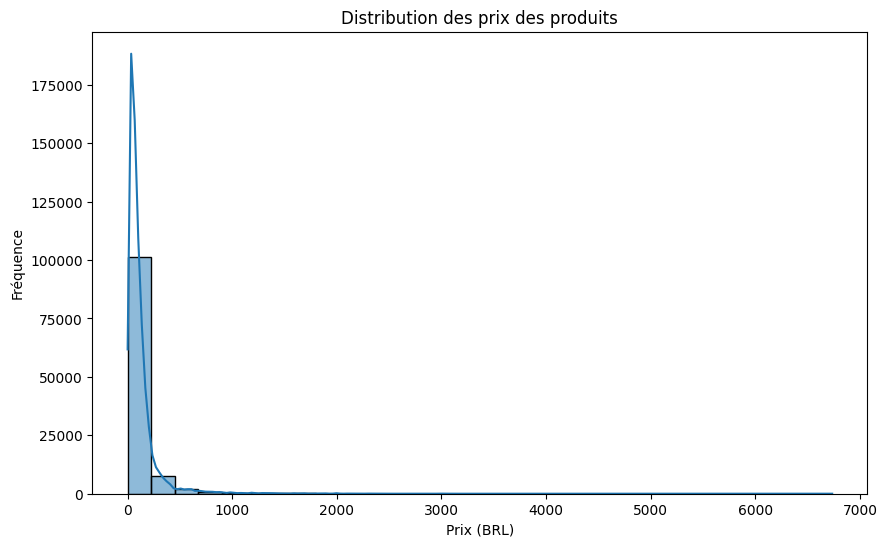

In [45]:

plt.figure(figsize=(10, 6))
sns.histplot(produits["price"], bins=30, kde=True)
plt.title("Distribution des prix des produits")
plt.xlabel("Prix (BRL)")
plt.ylabel("Fréquence")
plt.show()

Graphique 10 : Nombre moyen de produits vendus par commande

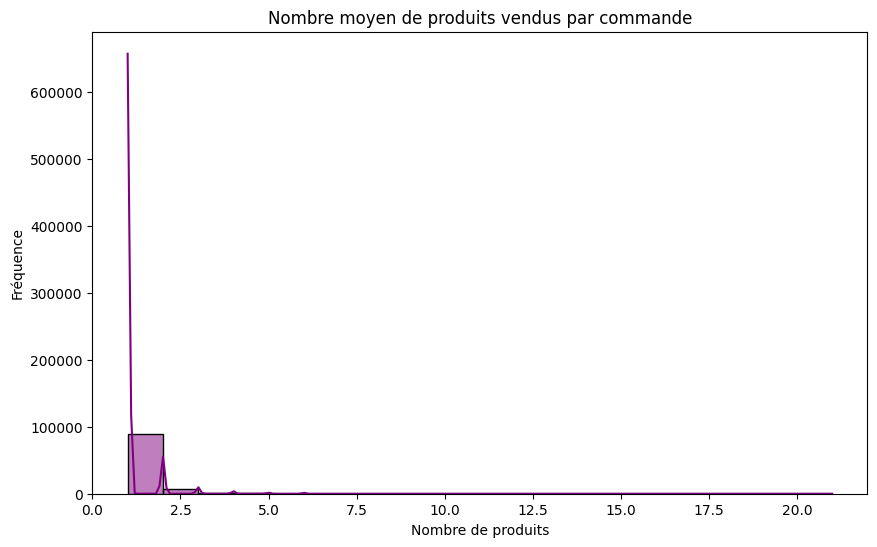

In [46]:
ventes_par_commande = produits.groupby("order_id")["product_id"].count()
plt.figure(figsize=(10, 6))
sns.histplot(ventes_par_commande, bins=20, kde=True, color='purple')
plt.title("Nombre moyen de produits vendus par commande")
plt.xlabel("Nombre de produits")
plt.ylabel("Fréquence")
plt.show()


  <h3>Vendeurs</h3>
    <p>Évaluation des performances des vendeurs et de leur impact sur la marketplace.</p>


Importations et configuration des données


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
analyse_achat = pd.read_parquet("./donnees/analyse_achat.parquet")

# Sélectionner les colonnes pertinentes
vendeurs_cols = ["seller_id", "sell_city", "sell_state", "price", "freight_value", "shipping_limit"]
vendeurs = analyse_achat[vendeurs_cols]

# Agréger les ventes par vendeur
vendeurs_summary = vendeurs.groupby("seller_id").agg({
    "price": "sum",
    "freight_value": "sum",
    "shipping_limit": "mean"
}).reset_index()

Graphique 1 : Top 10 des vendeurs par chiffre d'affaires

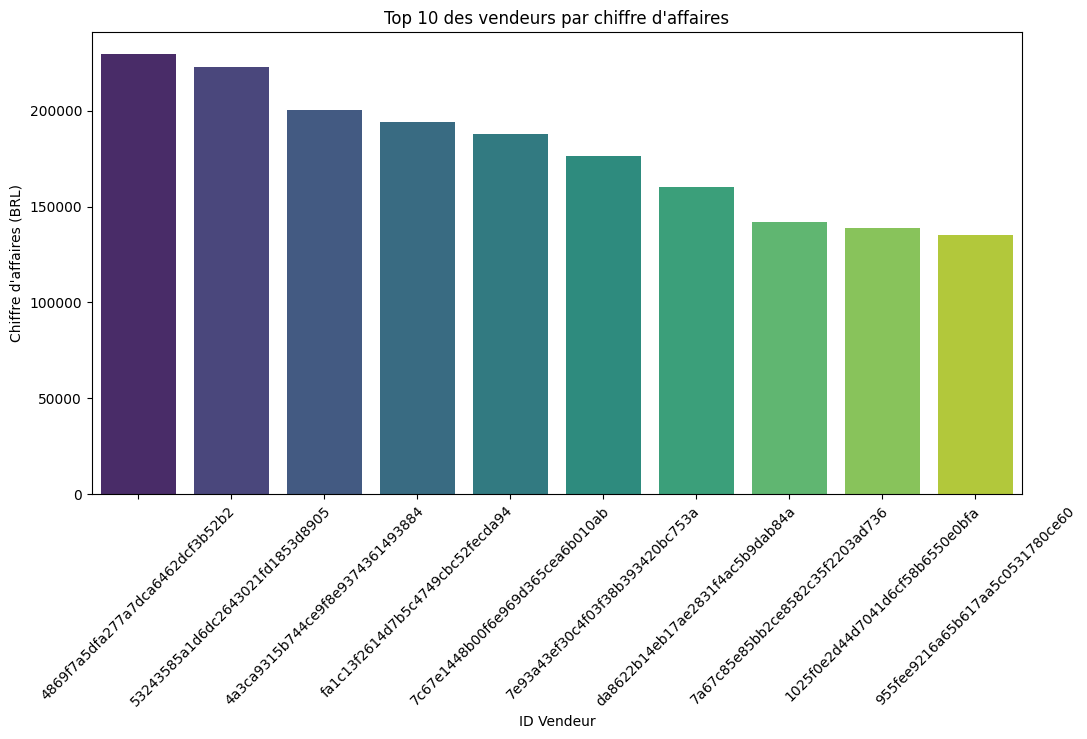

In [48]:
top_vendeurs = vendeurs_summary.nlargest(10, "price")
plt.figure(figsize=(12, 6))
sns.barplot(x="seller_id", y="price", hue="seller_id", data=top_vendeurs, palette="viridis", legend=False)
plt.title("Top 10 des vendeurs par chiffre d'affaires")
plt.xlabel("ID Vendeur")
plt.ylabel("Chiffre d'affaires (BRL)")
plt.xticks(rotation=45)
plt.show()


Graphique 2 : Distribution des revenus des vendeurs

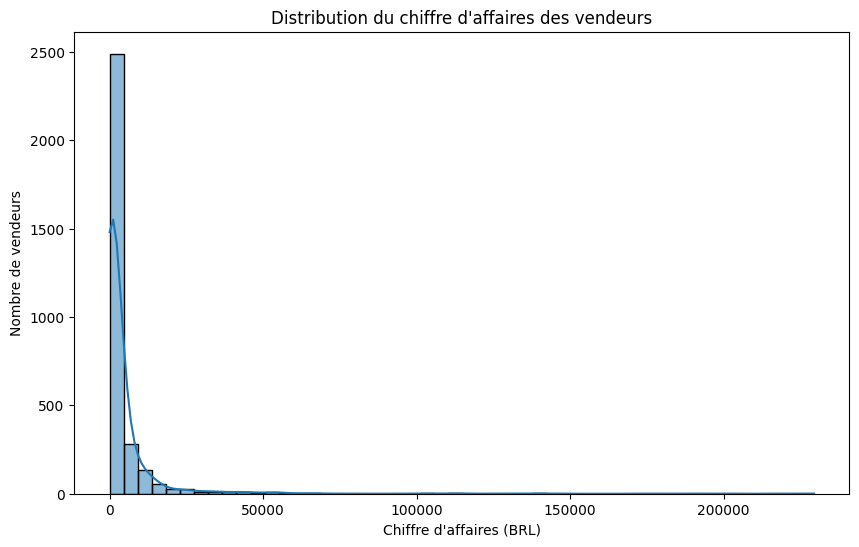

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(vendeurs_summary["price"], bins=50, kde=True)
plt.title("Distribution du chiffre d'affaires des vendeurs")
plt.xlabel("Chiffre d'affaires (BRL)")
plt.ylabel("Nombre de vendeurs")
plt.show()


Graphique 3 : Boxplot des frais de livraison

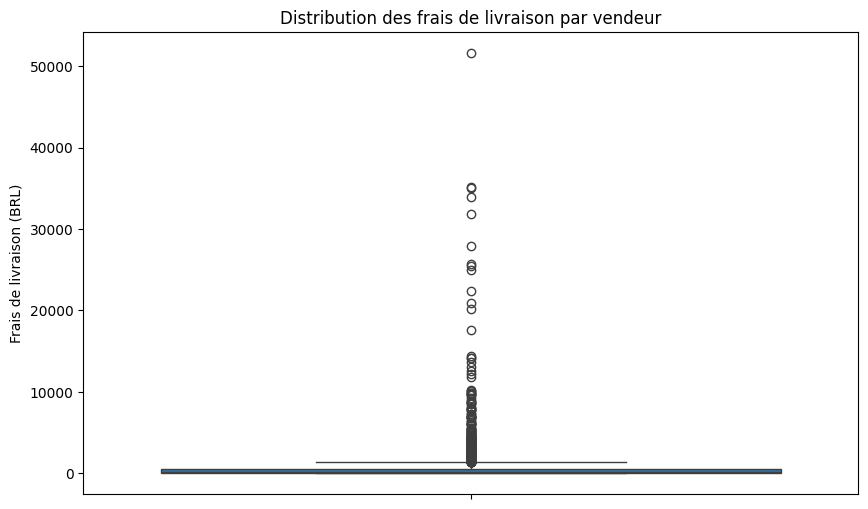

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=vendeurs_summary["freight_value"])
plt.title("Distribution des frais de livraison par vendeur")
plt.ylabel("Frais de livraison (BRL)")
plt.show()

Graphique 4 : Relation entre frais de livraison et chiffre d'affaires


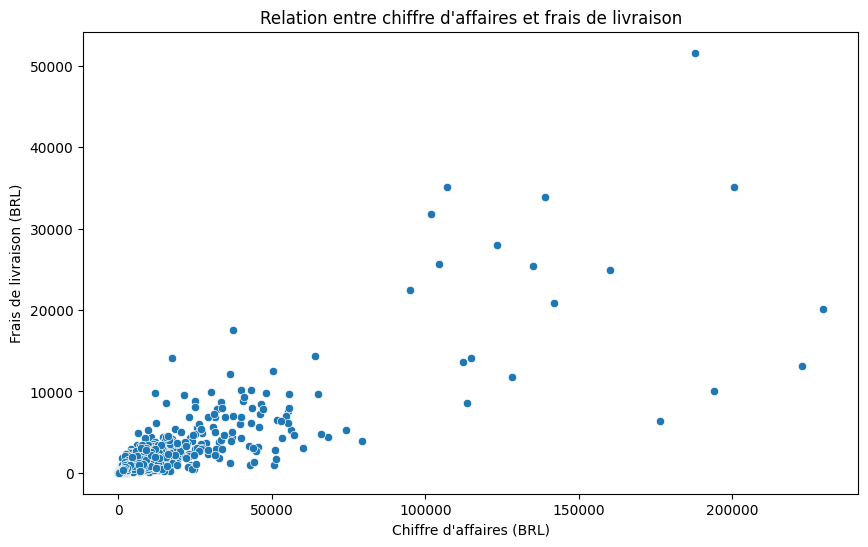

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=vendeurs_summary["price"], y=vendeurs_summary["freight_value"])
plt.title("Relation entre chiffre d'affaires et frais de livraison")
plt.xlabel("Chiffre d'affaires (BRL)")
plt.ylabel("Frais de livraison (BRL)")
plt.show()

Graphique 5 : Temps moyen d'expédition par vendeur

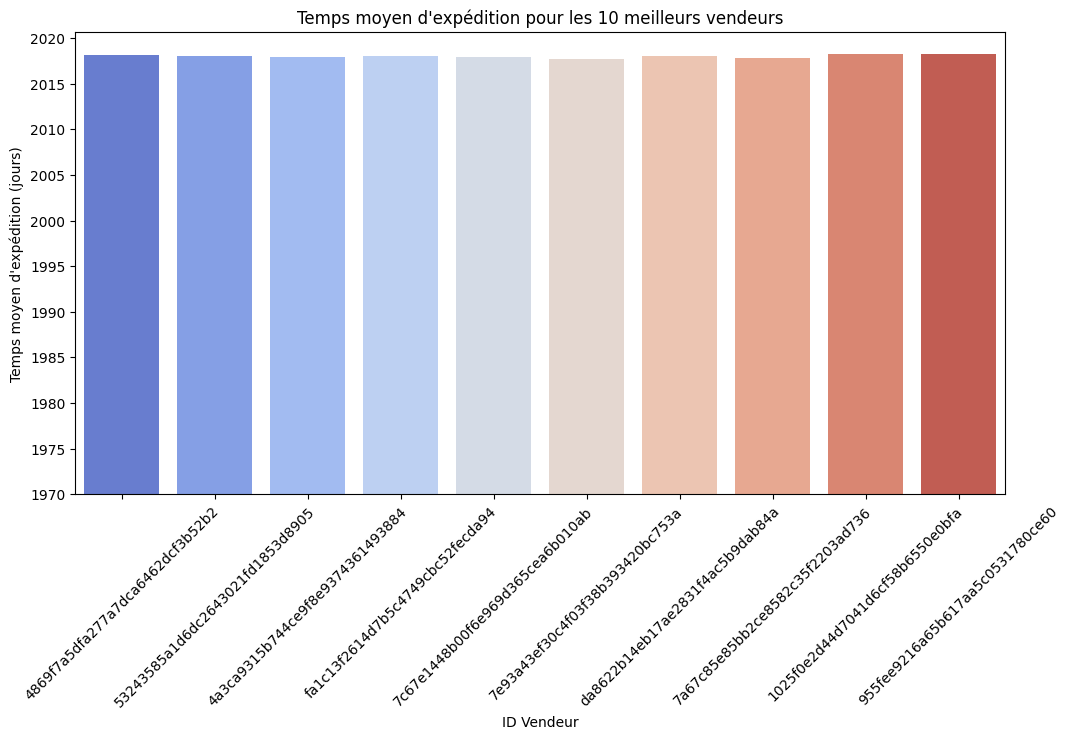

In [52]:

plt.figure(figsize=(12, 6))
sns.barplot(x="seller_id", y="shipping_limit", hue="seller_id", data=top_vendeurs, palette="coolwarm", legend=False)
plt.title("Temps moyen d'expédition pour les 10 meilleurs vendeurs")
plt.xlabel("ID Vendeur")
plt.ylabel("Temps moyen d'expédition (jours)")
plt.xticks(rotation=45)
plt.show()


 Graphique 6 : Heatmap des ventes par État

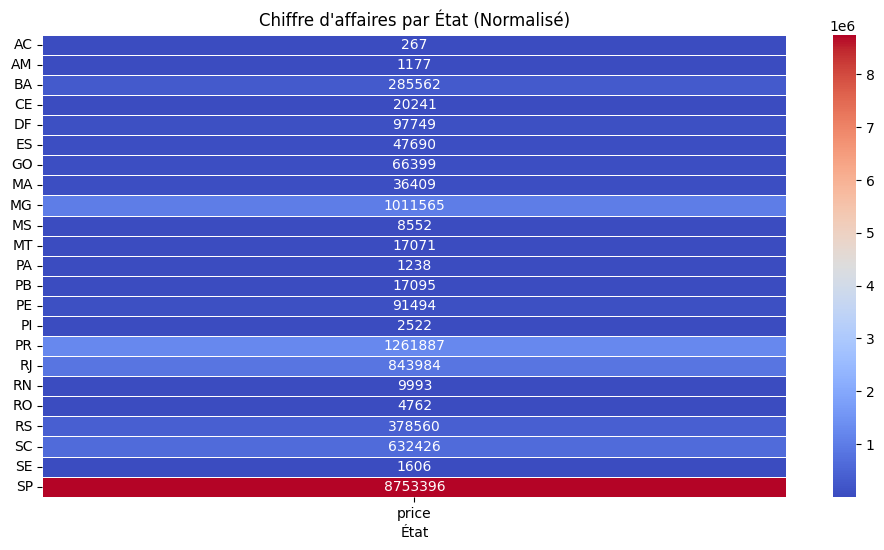

In [53]:

state_sales = analyse_achat.groupby("sell_state")["price"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.heatmap(state_sales.pivot_table(index="sell_state", values="price"), cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Chiffre d'affaires par État (Normalisé)")
plt.xlabel("État")
plt.ylabel("")
plt.show()

Graphique 7 : Évolution des ventes par mois

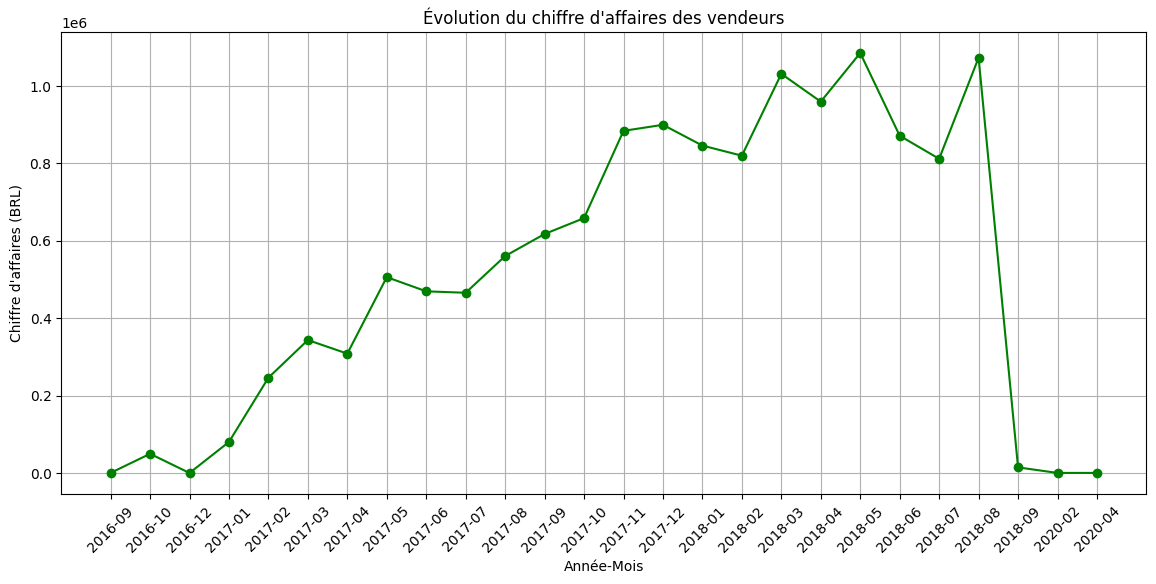

In [54]:

analyse_achat["annee_mois"] = pd.to_datetime(analyse_achat["shipping_limit"]).dt.to_period("M")
ventes_mois = analyse_achat.groupby("annee_mois")["price"].sum()
plt.figure(figsize=(14, 6))
plt.plot(ventes_mois.index.astype(str), ventes_mois, marker='o', linestyle='-', color='g')
plt.title("Évolution du chiffre d'affaires des vendeurs")
plt.xlabel("Année-Mois")
plt.ylabel("Chiffre d'affaires (BRL)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Graphique 8 : Nombre de vendeurs par ville

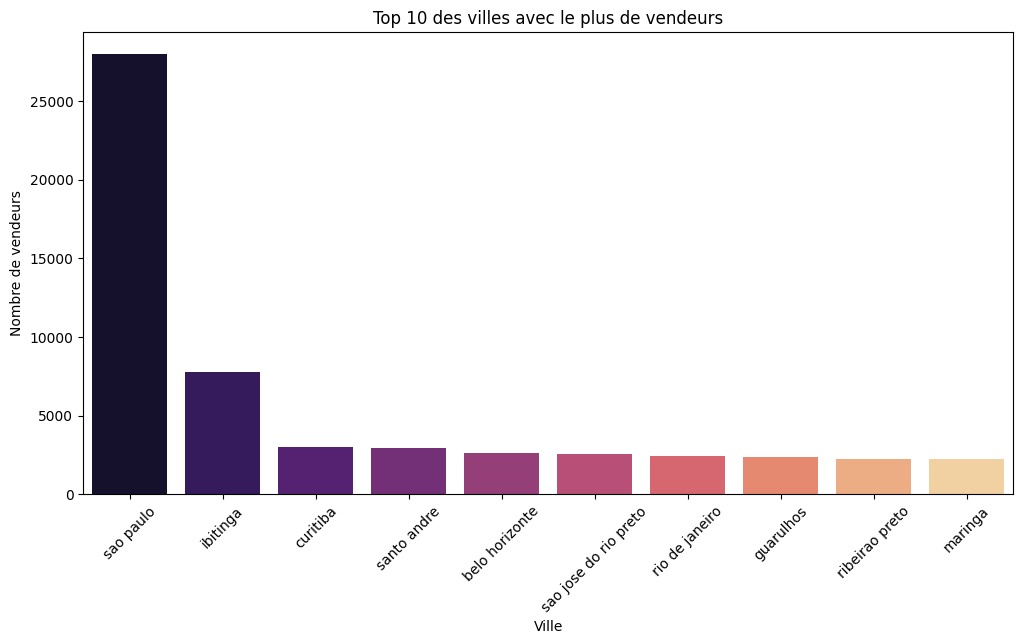

In [55]:
top_cities = vendeurs["sell_city"].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, hue=top_cities.index, palette="magma", legend=False)
plt.title("Top 10 des villes avec le plus de vendeurs")
plt.xlabel("Ville")
plt.ylabel("Nombre de vendeurs")
plt.xticks(rotation=45)
plt.show()

Graphique 9 : Corrélation entre variables

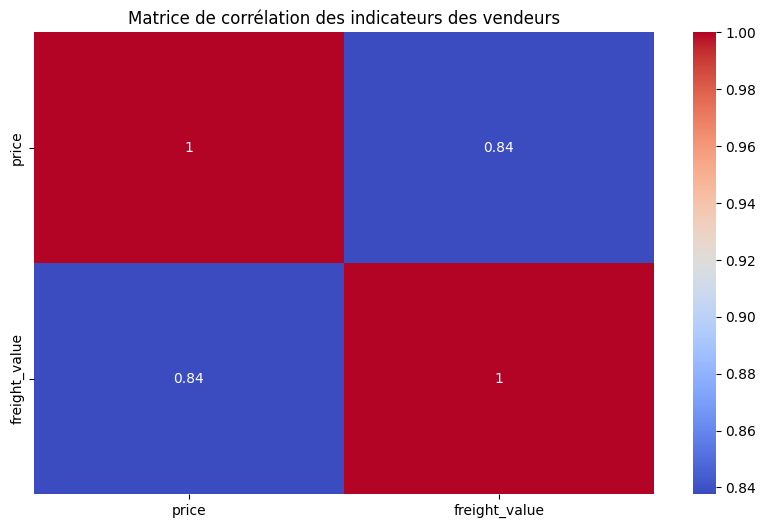

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(vendeurs_summary.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des indicateurs des vendeurs")
plt.show()

Graphique 10 : Histogramme du délai moyen de livraison

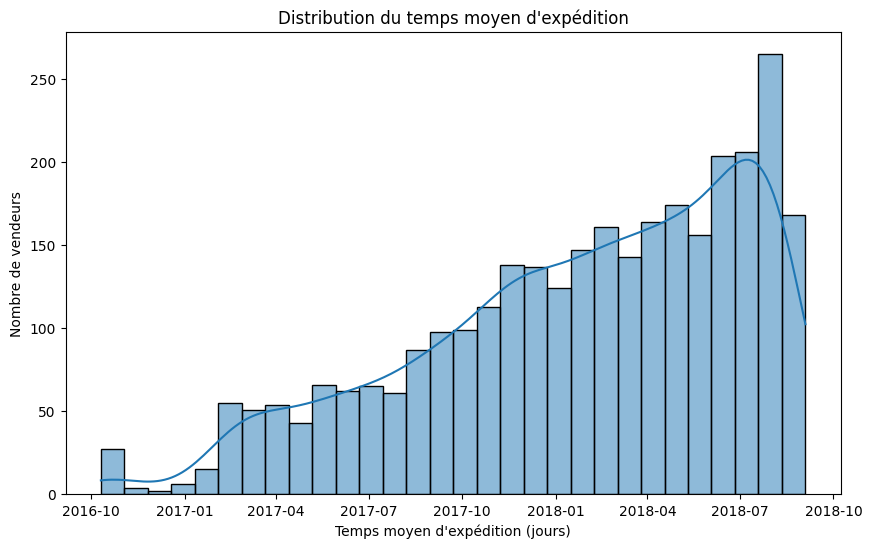

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(vendeurs_summary["shipping_limit"], bins=30, kde=True)
plt.title("Distribution du temps moyen d'expédition")
plt.xlabel("Temps moyen d'expédition (jours)")
plt.ylabel("Nombre de vendeurs")
plt.show()

<h3>Logistique</h3>
<p>Analyse des partenaires logistiques et de l’efficacité du réseau de distribution.</p>

Importations et configuration des données


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
analyse_achat = pd.read_parquet("./donnees/analyse_achat.parquet")

# Extraire les dimensions utiles
analyse_achat["purchase_timestamp"] = pd.to_datetime(analyse_achat["purchase_timestamp"])
analyse_achat["annee"] = analyse_achat["purchase_timestamp"].dt.year
analyse_achat["mois"] = analyse_achat["purchase_timestamp"].dt.month
analyse_achat["jour"] = analyse_achat["purchase_timestamp"].dt.day

# Sélectionner les colonnes logistiques
logistics_cols = ["freight_value", "weight_g", "length_cm", "height_cm", "width_cm"]
logistics_data = analyse_achat[logistics_cols]

 Graphique 1 : Répartition du coût de transport

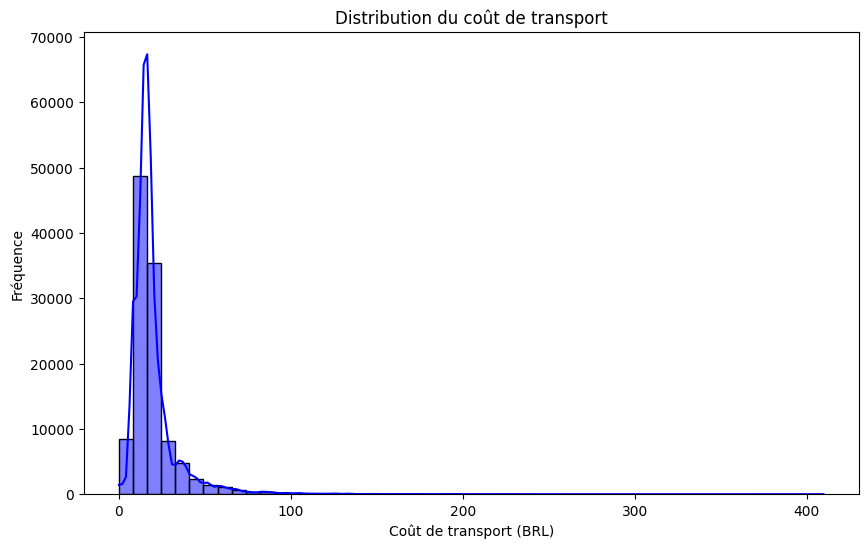

In [59]:

plt.figure(figsize=(10, 6))
sns.histplot(analyse_achat["freight_value"], bins=50, kde=True, color='blue')
plt.title("Distribution du coût de transport")
plt.xlabel("Coût de transport (BRL)")
plt.ylabel("Fréquence")
plt.show()


Graphique 2 : Corrélation entre poids et coût de transport

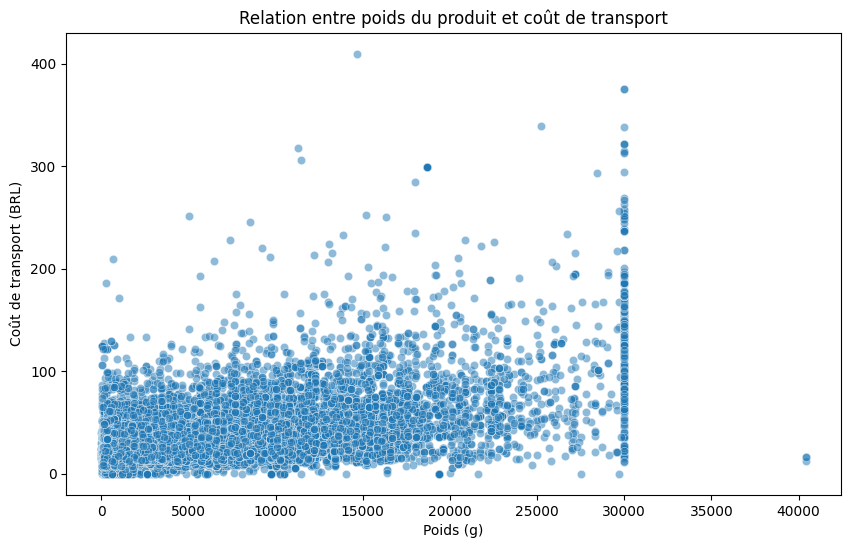

In [60]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=analyse_achat["weight_g"], y=analyse_achat["freight_value"], alpha=0.5)
plt.title("Relation entre poids du produit et coût de transport")
plt.xlabel("Poids (g)")
plt.ylabel("Coût de transport (BRL)")
plt.show()


Graphique 3 : Répartition des coûts de transport par mois

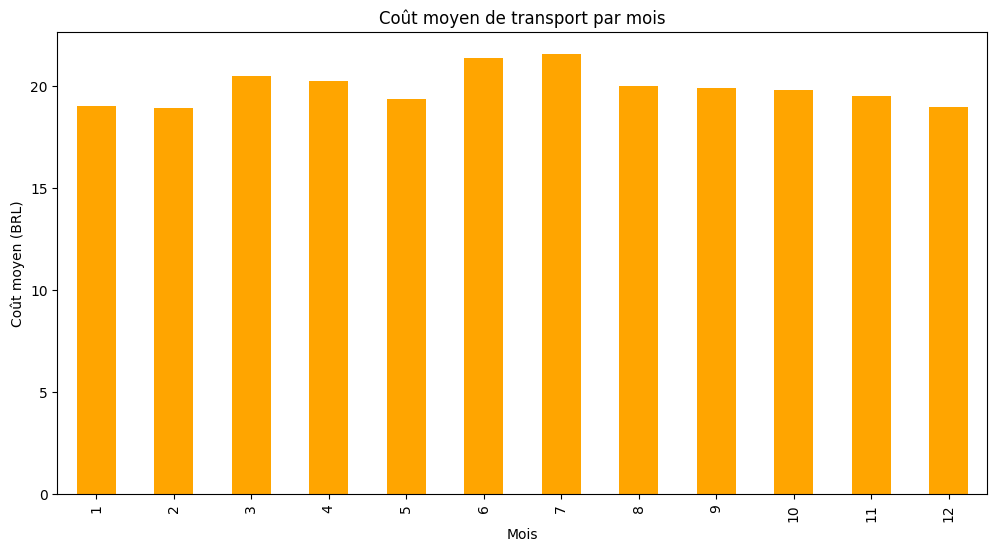

In [61]:

logistics_month = analyse_achat.groupby("mois")["freight_value"].mean()
plt.figure(figsize=(12, 6))
logistics_month.plot(kind='bar', color='orange')
plt.title("Coût moyen de transport par mois")
plt.xlabel("Mois")
plt.ylabel("Coût moyen (BRL)")
plt.show()


 Graphique 4 : Boxplot des coûts logistiques par catégorie de produit

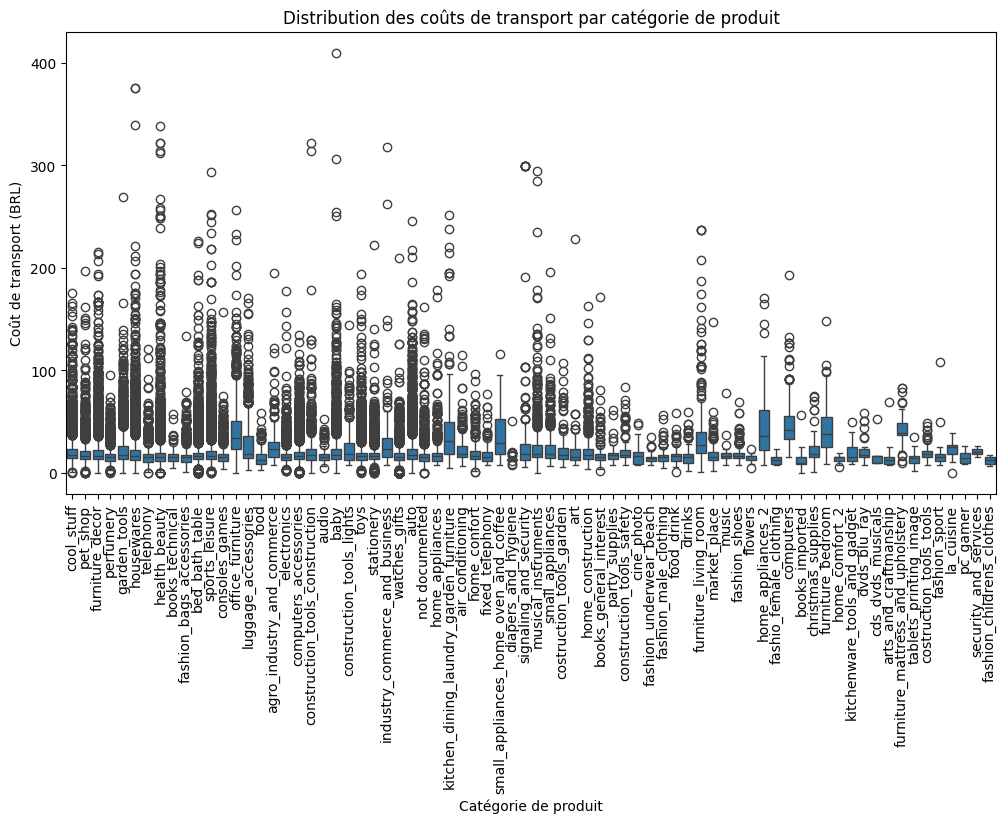

In [62]:

plt.figure(figsize=(12, 6))
sns.boxplot(x=analyse_achat["category_name"], y=analyse_achat["freight_value"])
plt.xticks(rotation=90)
plt.title("Distribution des coûts de transport par catégorie de produit")
plt.xlabel("Catégorie de produit")
plt.ylabel("Coût de transport (BRL)")
plt.show()

Graphique 5 : Heatmap des corrélations logistiques

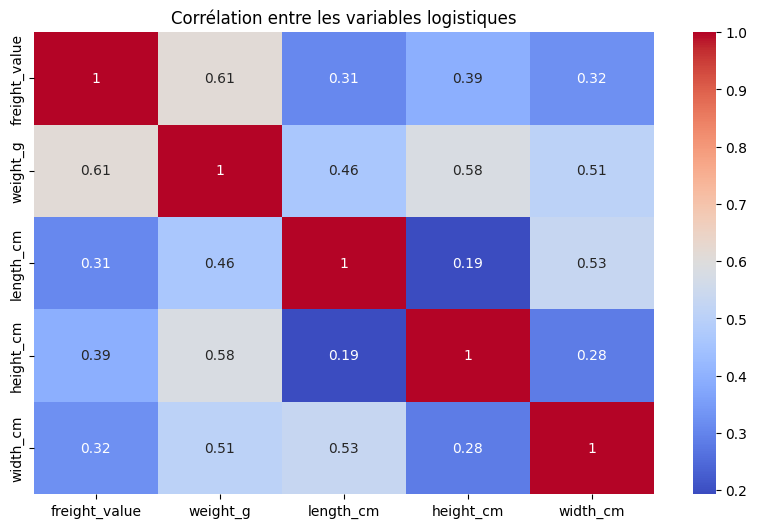

In [63]:

plt.figure(figsize=(10, 6))
sns.heatmap(logistics_data.corr(), annot=True, cmap="coolwarm")
plt.title("Corrélation entre les variables logistiques")
plt.show()

Graphique 6 : Distribution du volume des colis expédiés

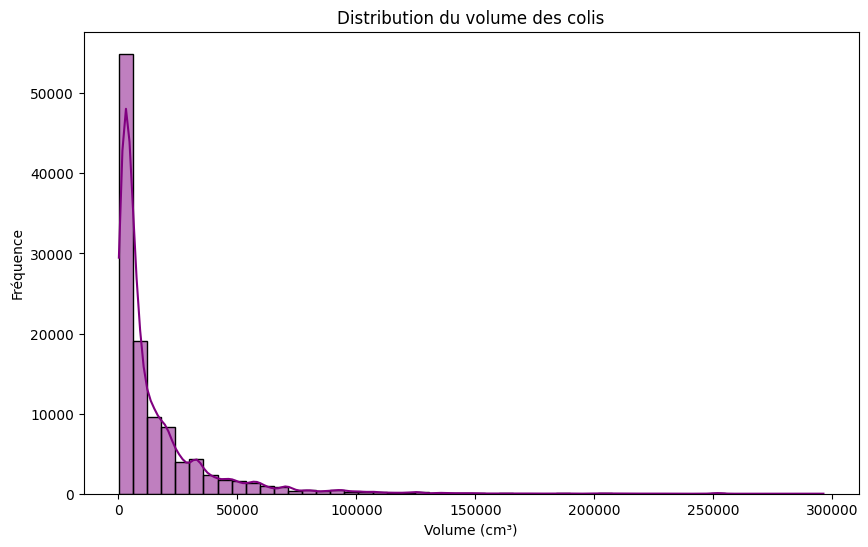

In [64]:

analyse_achat["volume"] = analyse_achat["length_cm"] * analyse_achat["width_cm"] * analyse_achat["height_cm"]
plt.figure(figsize=(10, 6))
sns.histplot(analyse_achat["volume"], bins=50, kde=True, color='purple')
plt.title("Distribution du volume des colis")
plt.xlabel("Volume (cm³)")
plt.ylabel("Fréquence")
plt.show()


Graphique 7 : Relation entre volume et coût de transport

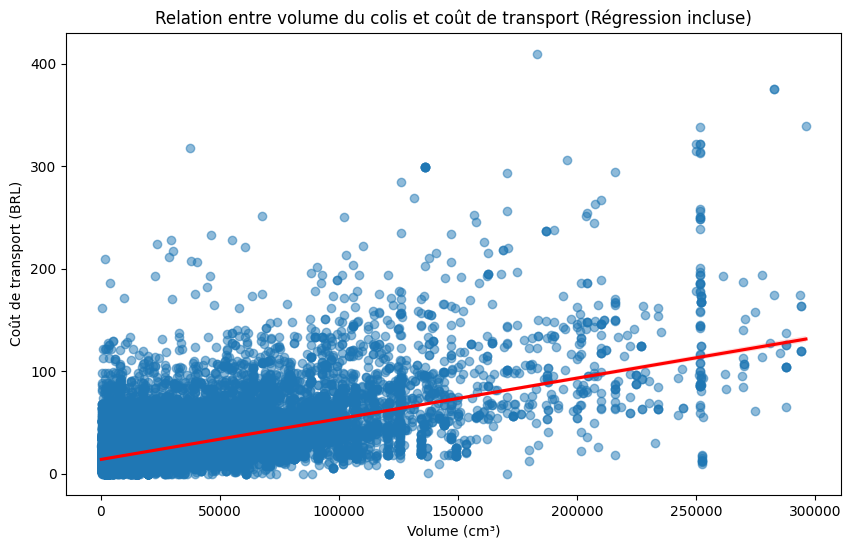

In [65]:

analyse_achat["volume"] = analyse_achat["length_cm"] * analyse_achat["width_cm"] * analyse_achat["height_cm"]
plt.figure(figsize=(10, 6))
sns.regplot(x=analyse_achat["volume"], y=analyse_achat["freight_value"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relation entre volume du colis et coût de transport (Régression incluse)")
plt.xlabel("Volume (cm³)")
plt.ylabel("Coût de transport (BRL)")
plt.show()

Graphique 8 : Coût de transport moyen par état du vendeur

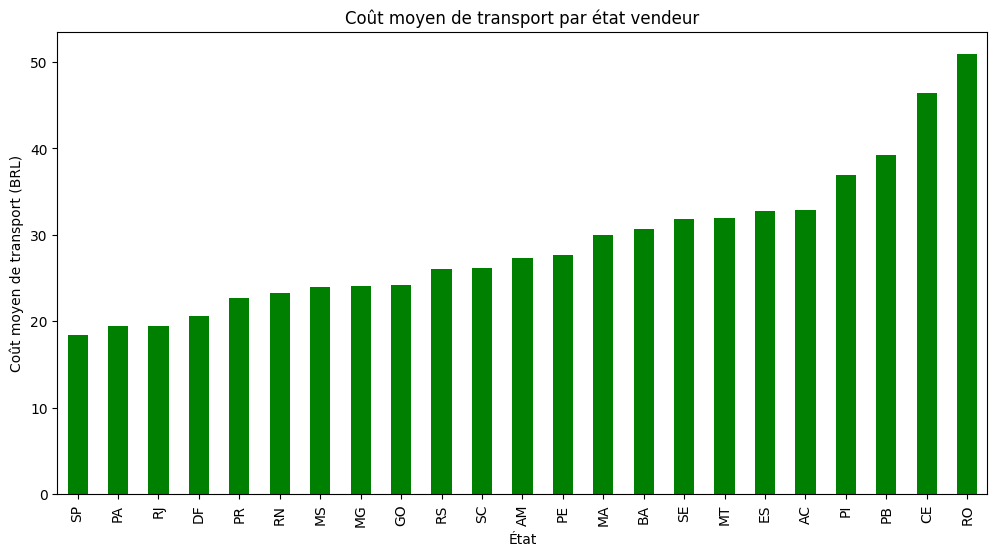

In [66]:

freight_by_state = analyse_achat.groupby("sell_state")["freight_value"].mean().sort_values()
plt.figure(figsize=(12, 6))
freight_by_state.plot(kind='bar', color='green')
plt.title("Coût moyen de transport par état vendeur")
plt.xlabel("État")
plt.ylabel("Coût moyen de transport (BRL)")
plt.show()

Graphique 9 : Évolution du coût de transport dans le temps

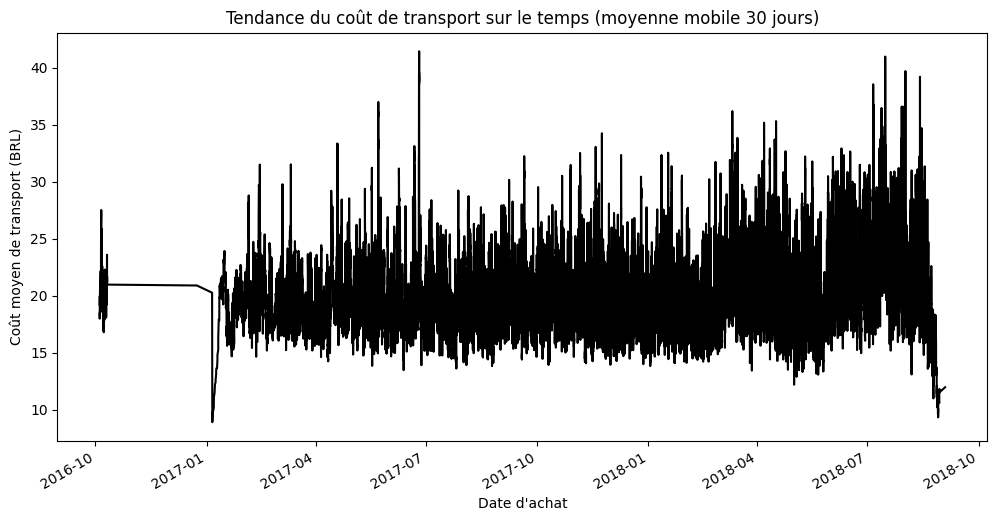

In [67]:

freight_time_series = analyse_achat.groupby("purchase_timestamp")["freight_value"].mean().rolling(window=30).mean()
plt.figure(figsize=(12, 6))
freight_time_series.plot(color='black')
plt.title("Tendance du coût de transport sur le temps (moyenne mobile 30 jours)")
plt.xlabel("Date d'achat")
plt.ylabel("Coût moyen de transport (BRL)")
plt.show()


Graphique 10 : Répartition des frais de transport par taille de colis

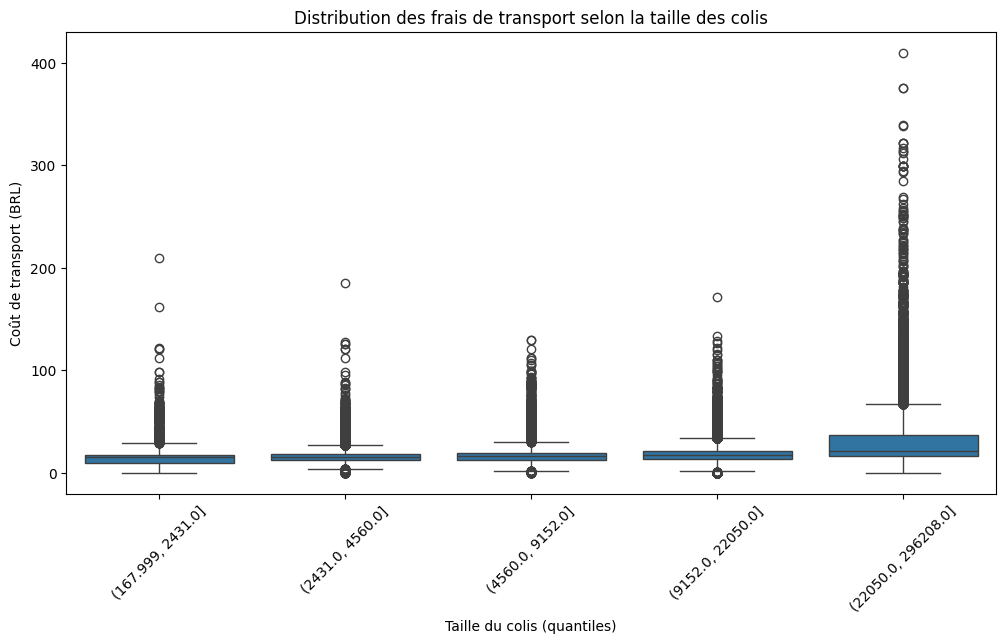

In [68]:

plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.qcut(analyse_achat["volume"], q=5), y=analyse_achat["freight_value"])
plt.xticks(rotation=45)
plt.title("Distribution des frais de transport selon la taille des colis")
plt.xlabel("Taille du colis (quantiles)")
plt.ylabel("Coût de transport (BRL)")
plt.show()
